# HR Analytics Project- Understanding the Attrition in HR

Problem Statement: 

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics:

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR:

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies:

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("All libraries are loaded succesfully")

All libraries are loaded succesfully


In [2]:
df = pd.read_csv("HRAnalytics.csv")
print("HR analytics data loaded succesfully")

HR analytics data loaded succesfully


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

we can see that there are 1470 rows and 35 columns in the datasets.

# Label in datasets

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

here in the datsets-
target variable is Attrition and
feature variables are all others.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We cn clearly see that we have 1470 rows with no null values in our data set. We have two types of data types in our data set i.e. int64 and object.
And, target variable i.e attrition is categorical variable.

In [7]:
print("VALUE COUNT OF EACH COlUMNS")
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

VALUE COUNT OF EACH COlUMNS
35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32


# Exploratory Data Analysis

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

no null values are present in the datsets

check no null values present by using heatmap


<AxesSubplot:>

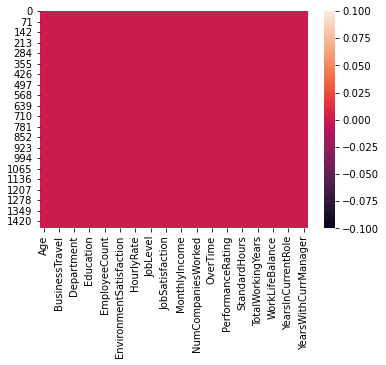

In [9]:
print('check no null values present by using heatmap')
sns.heatmap(df.isnull())

# Data Visualization

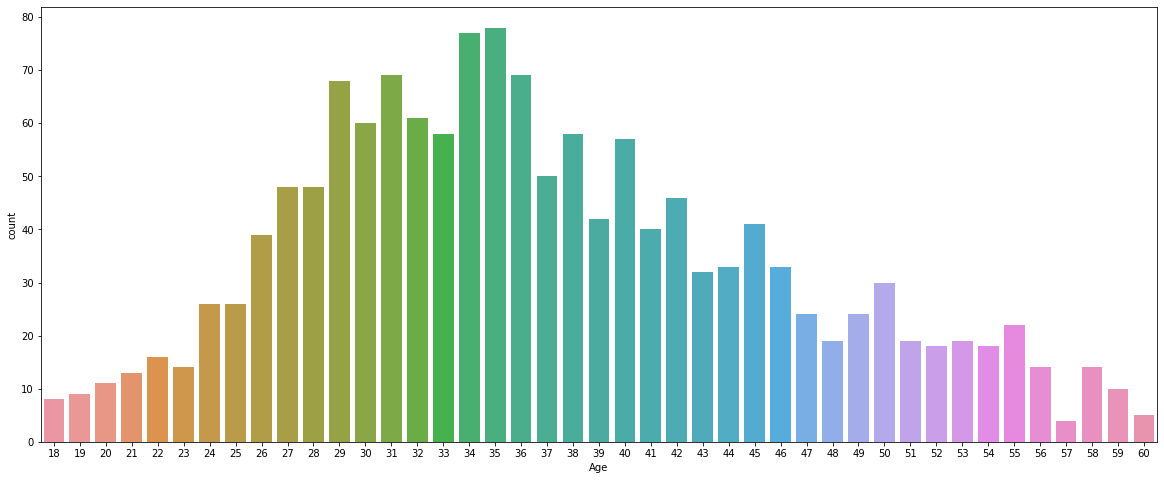

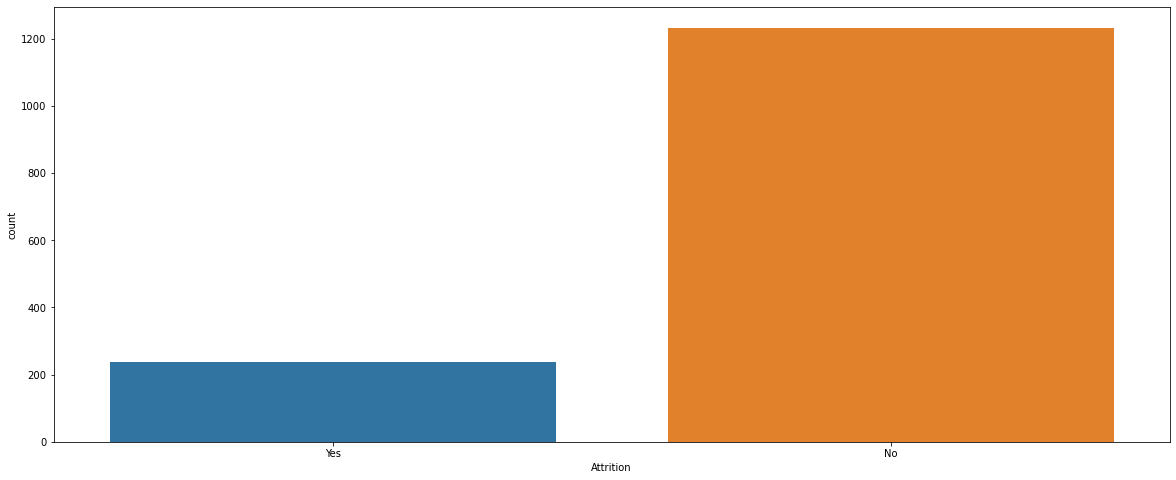

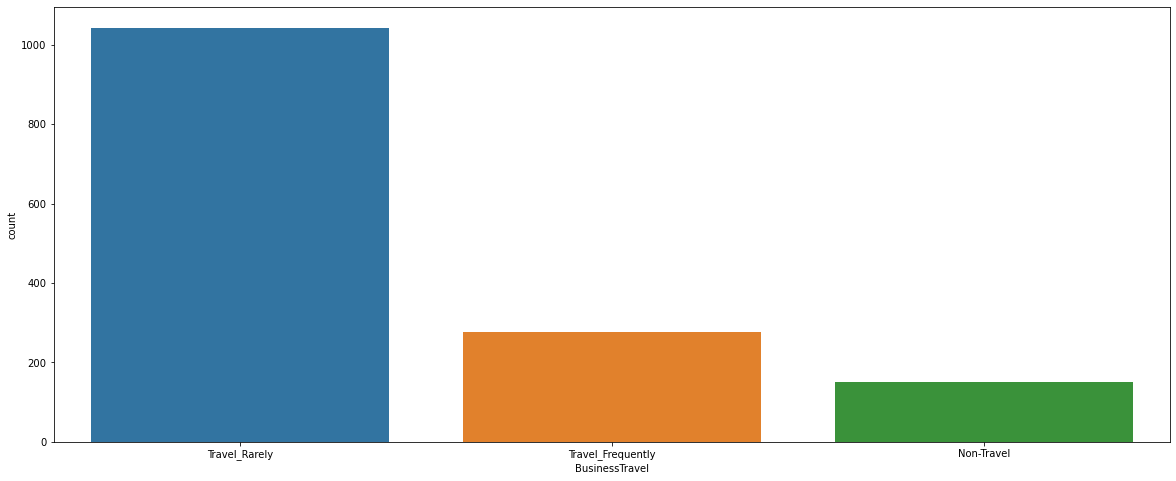

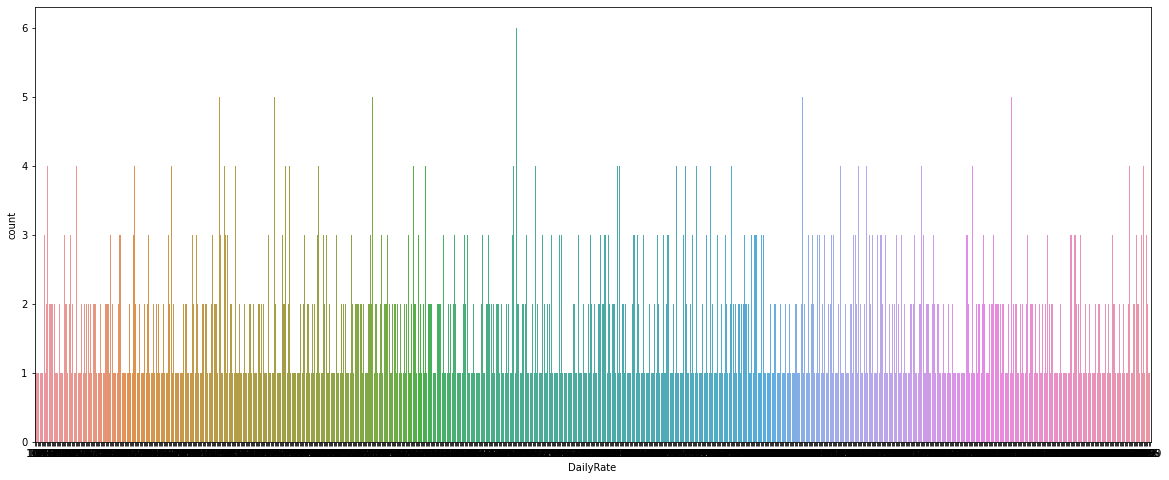

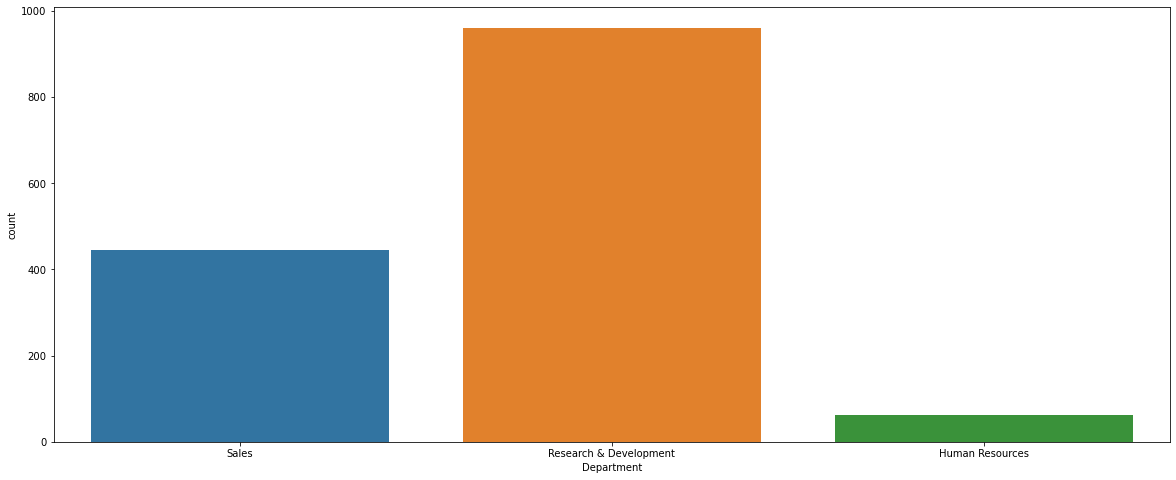

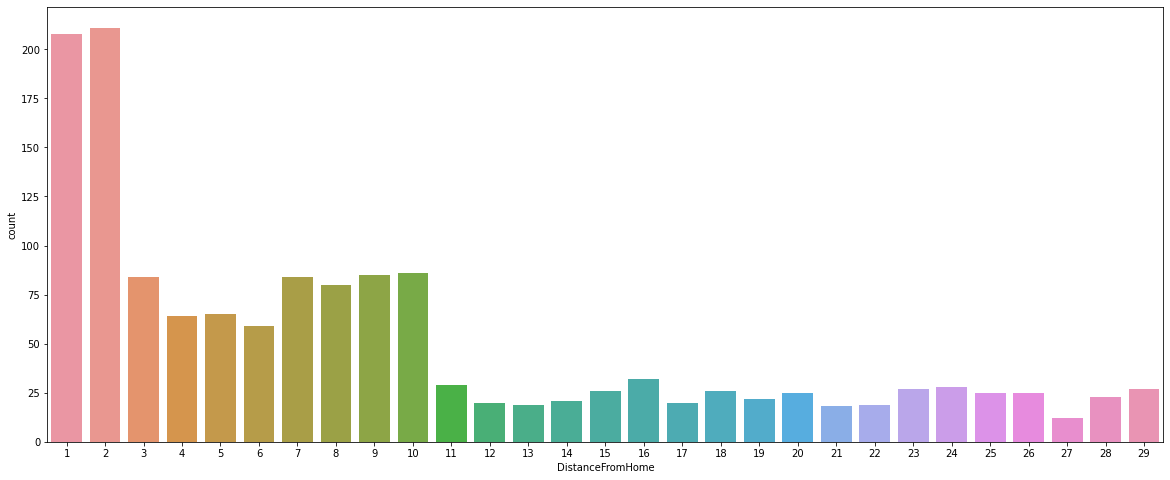

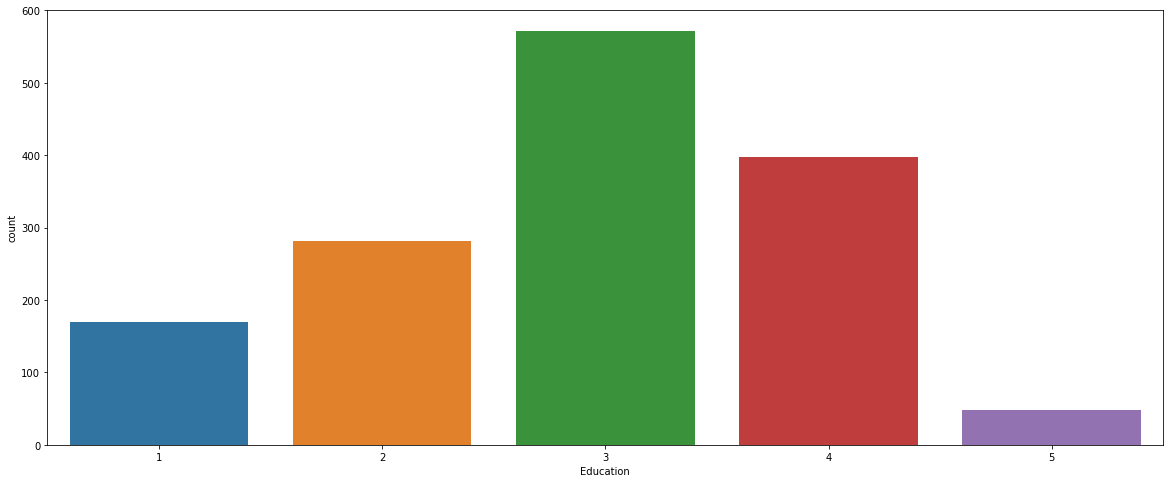

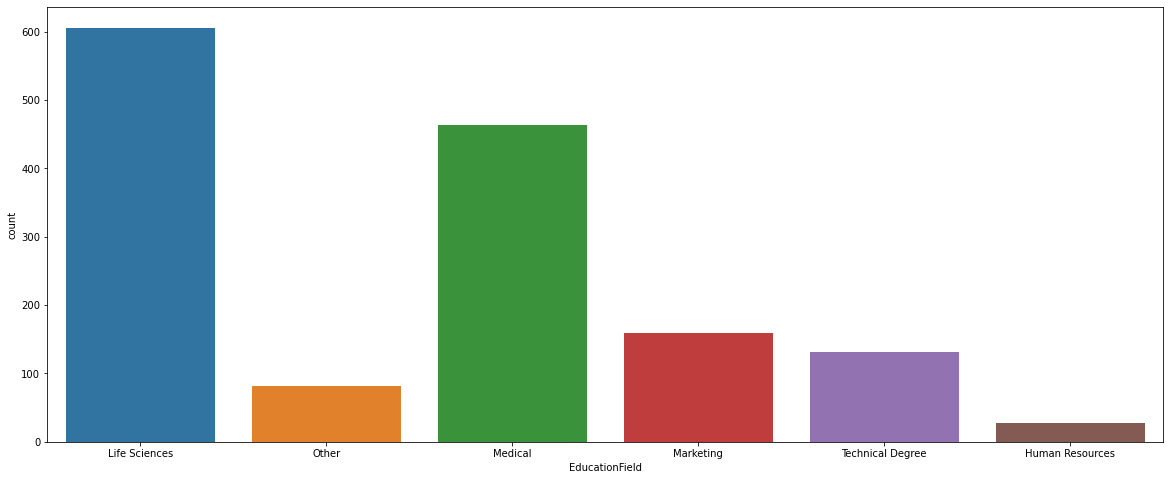

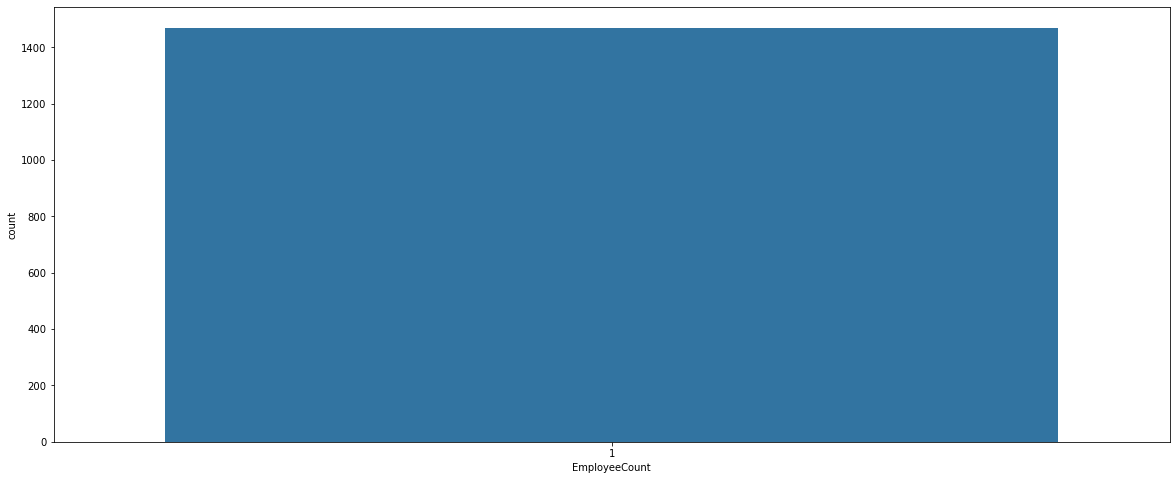

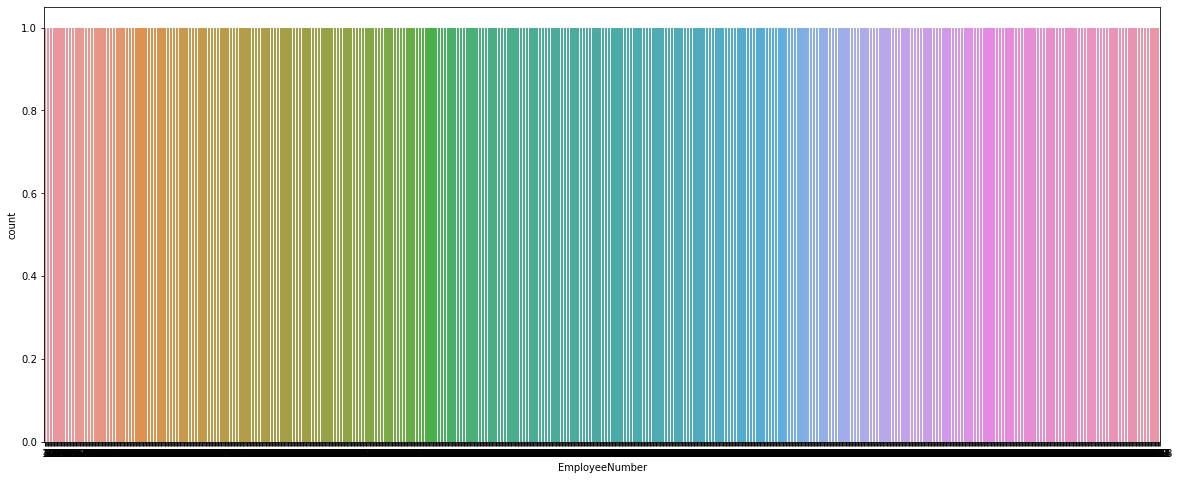

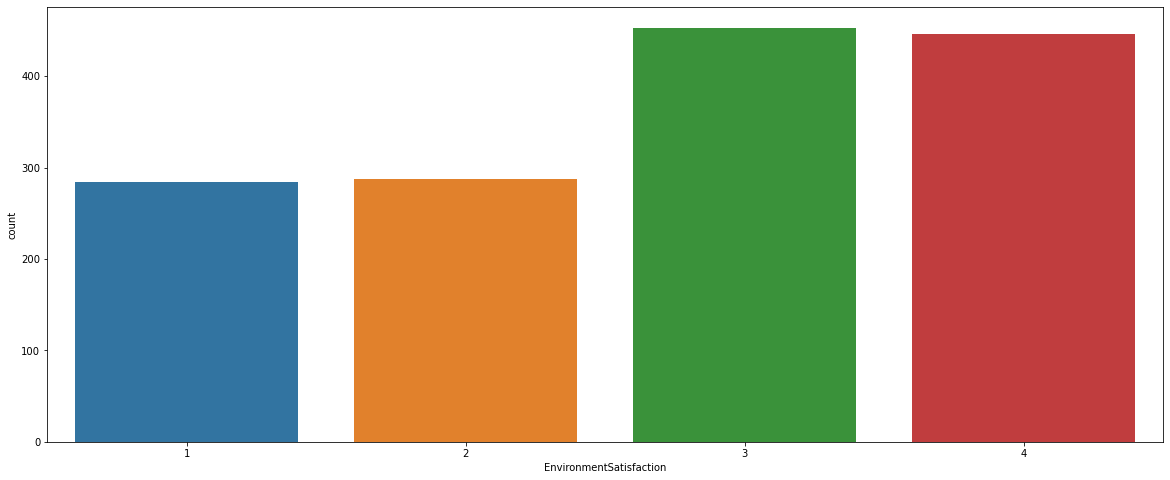

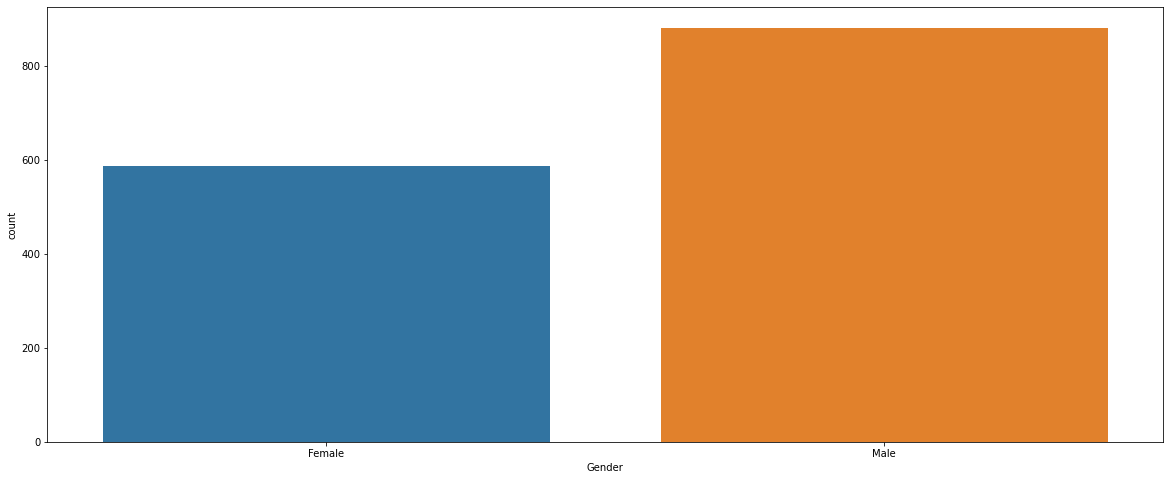

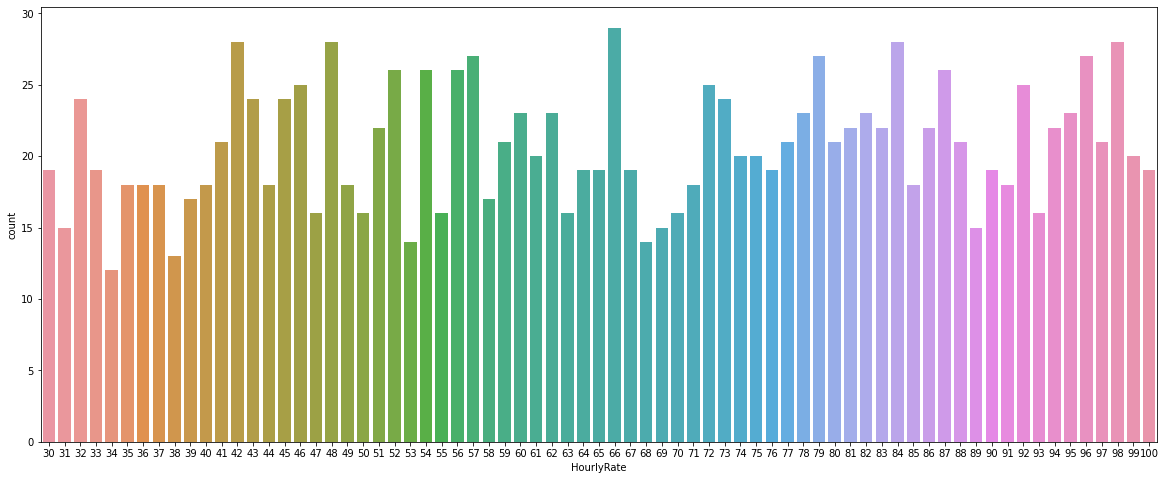

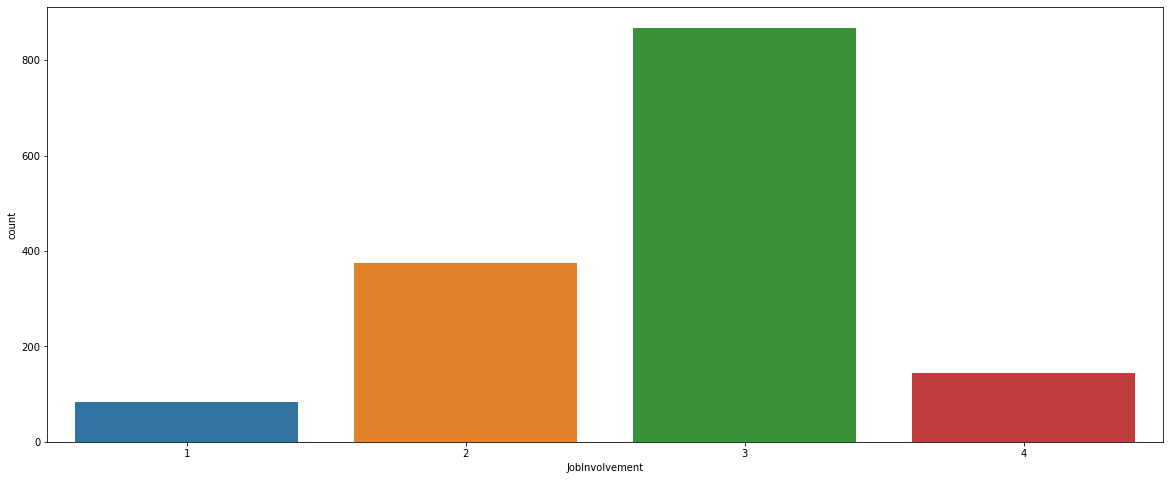

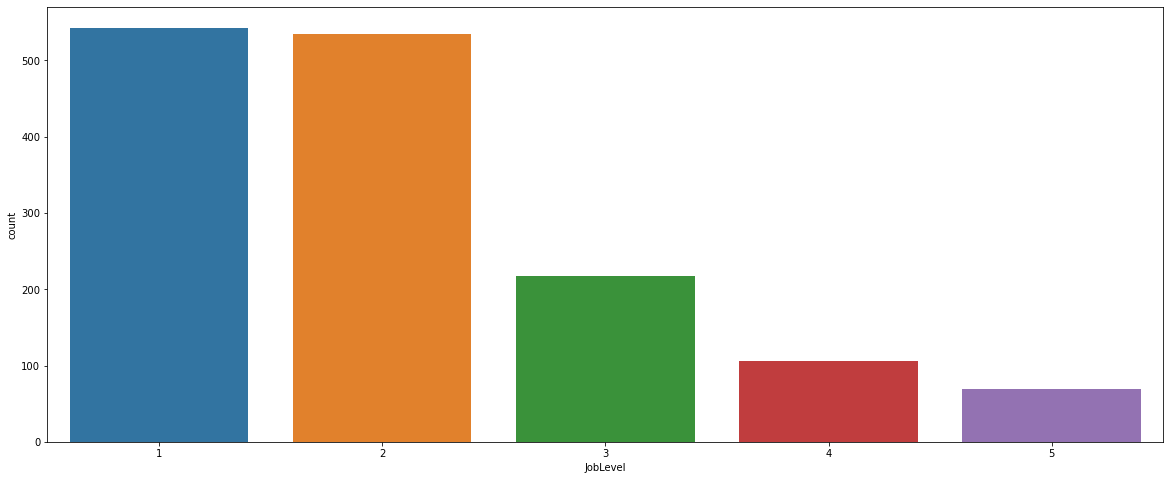

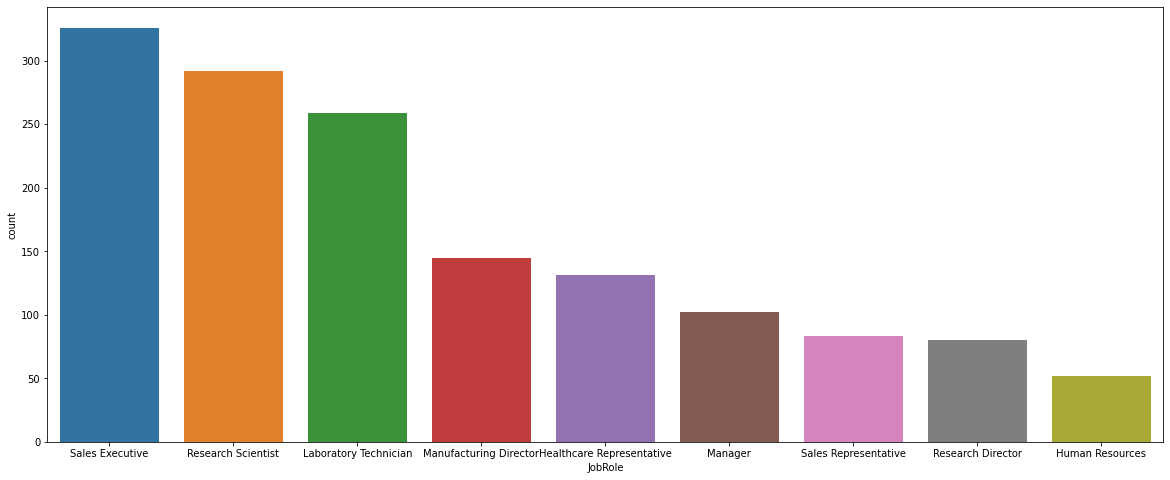

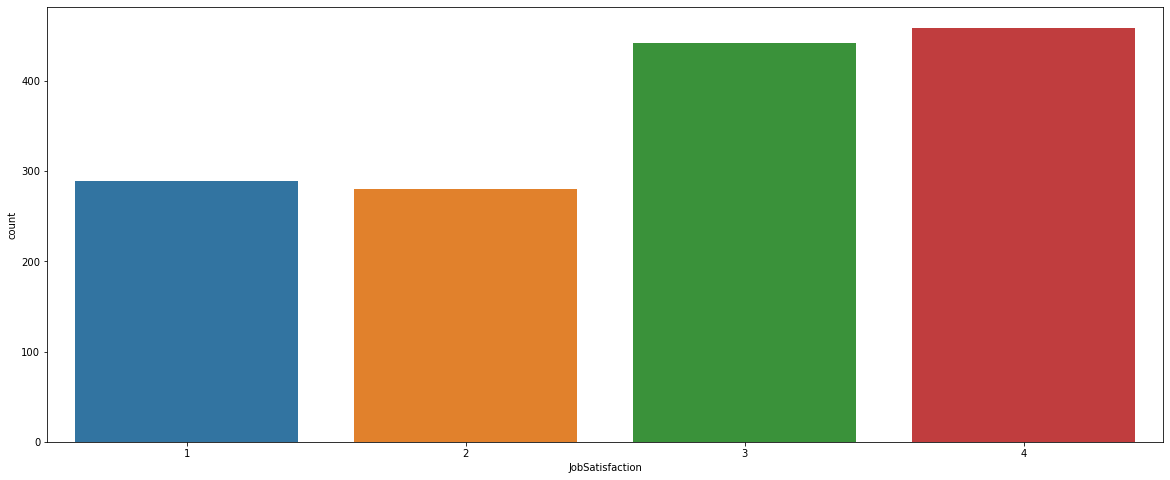

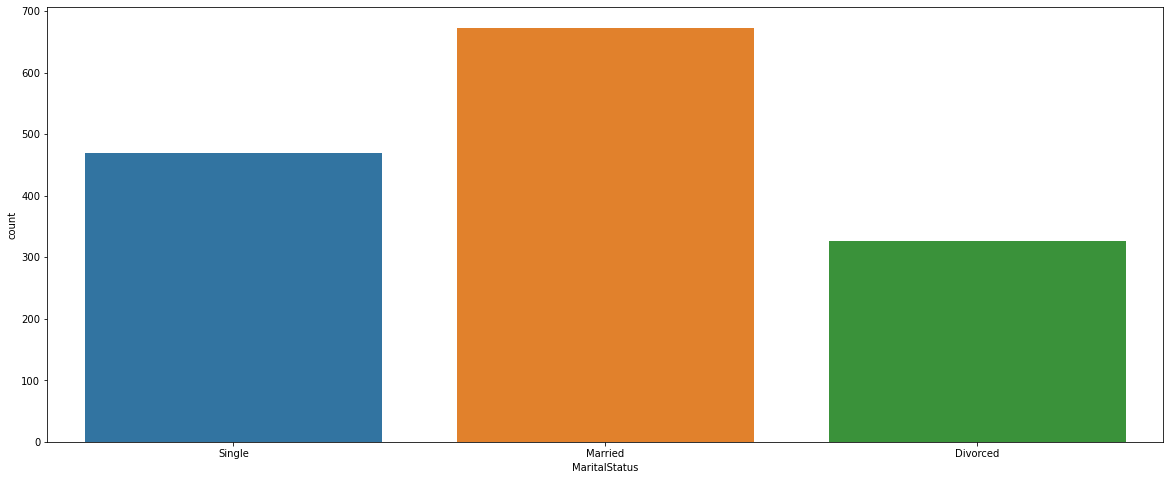

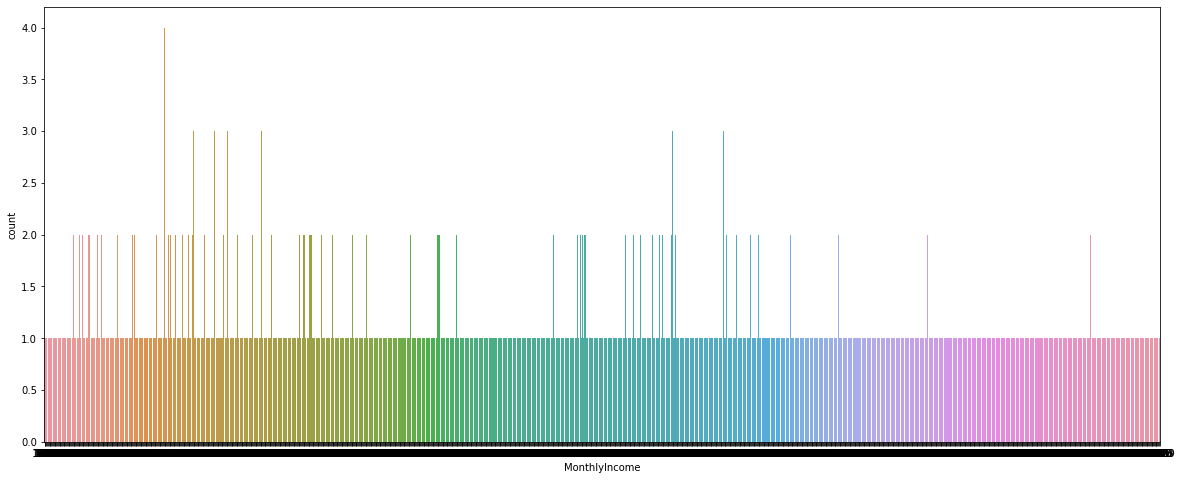

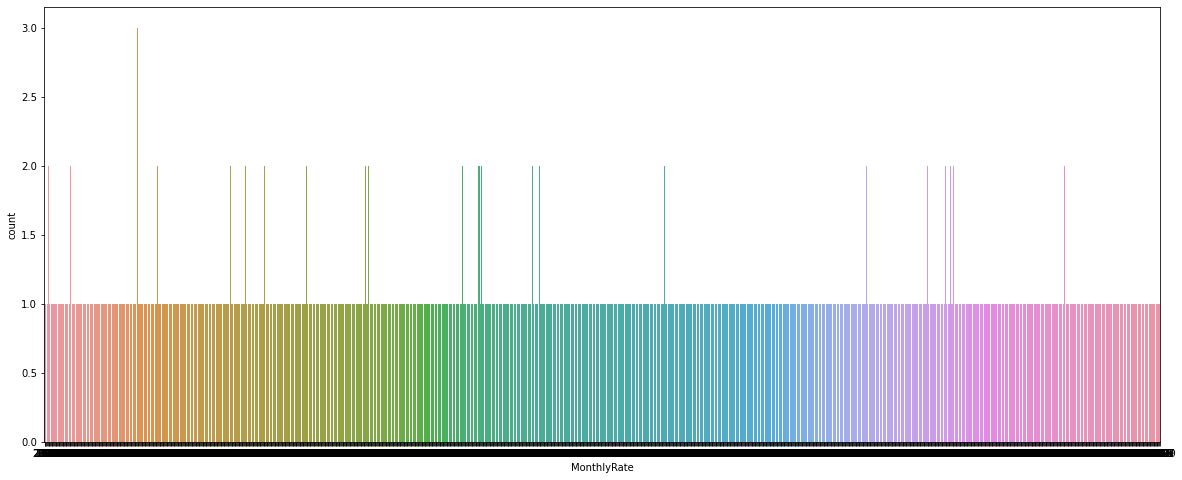

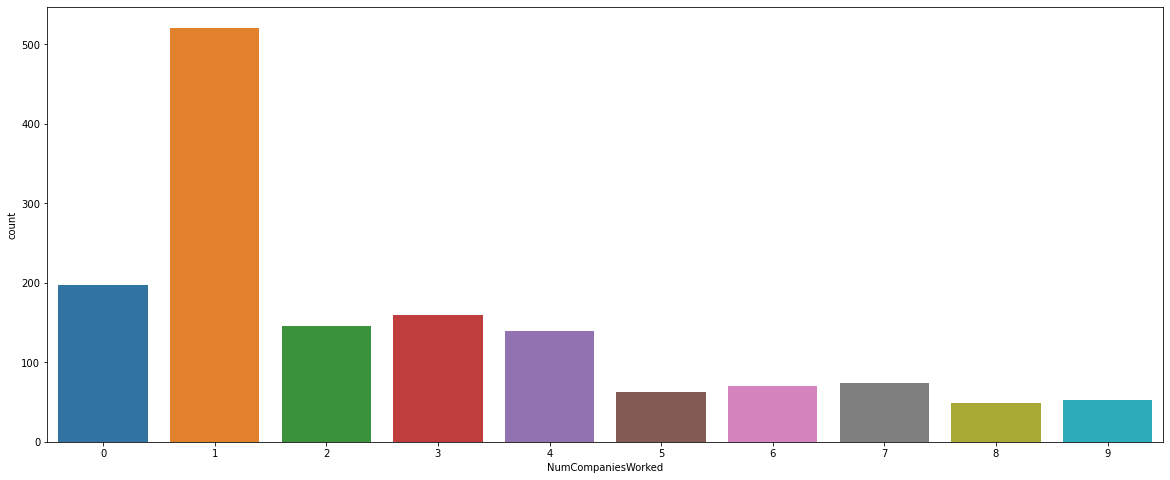

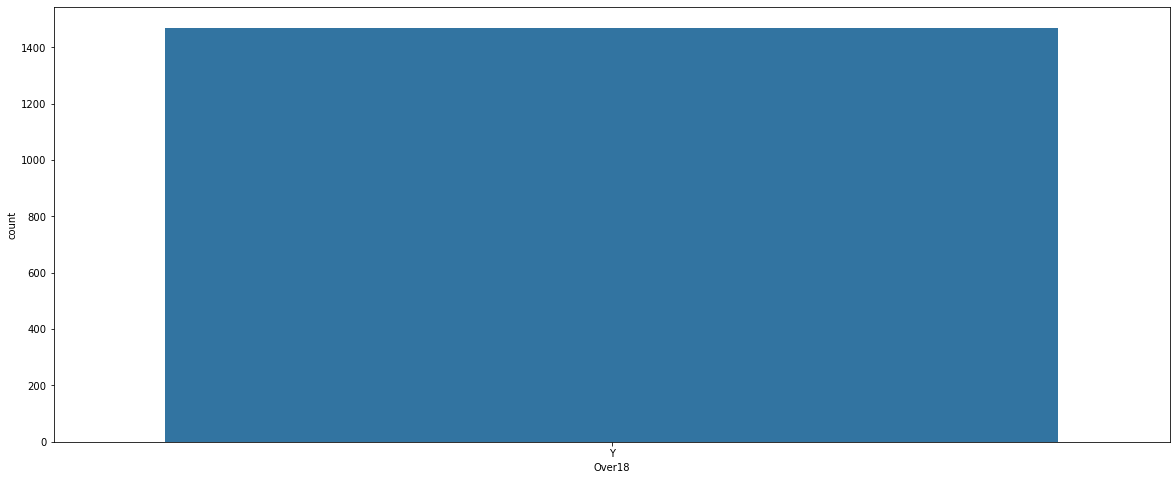

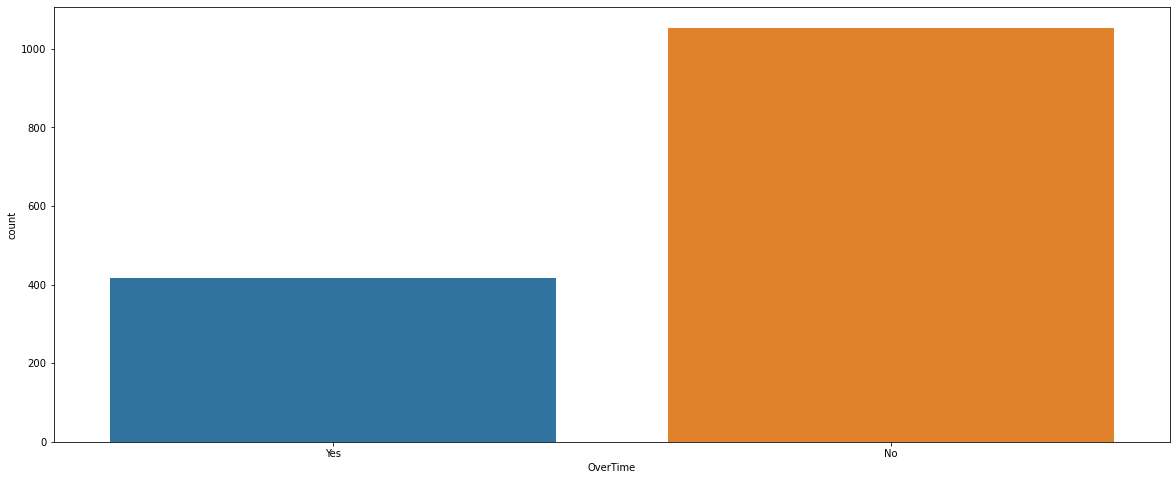

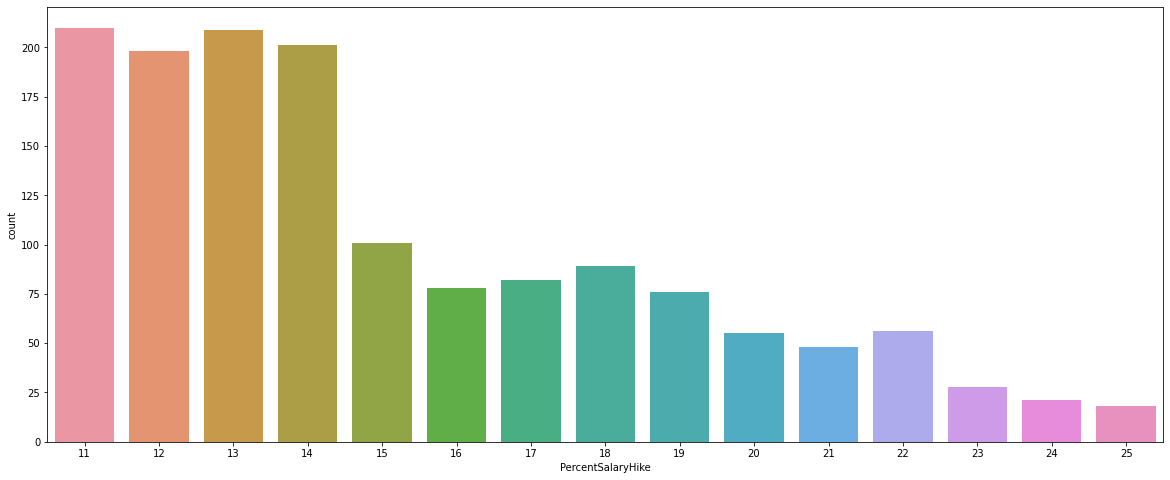

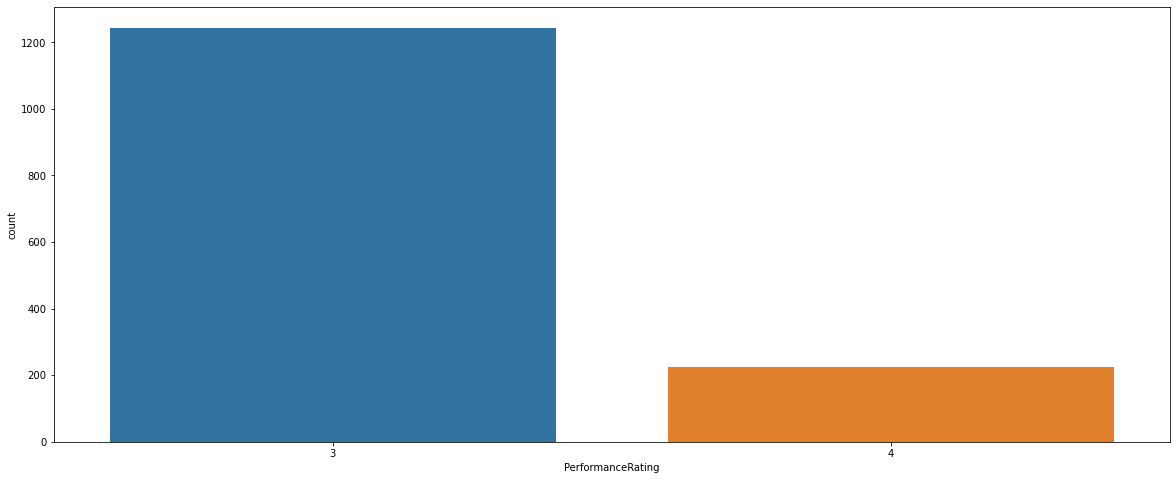

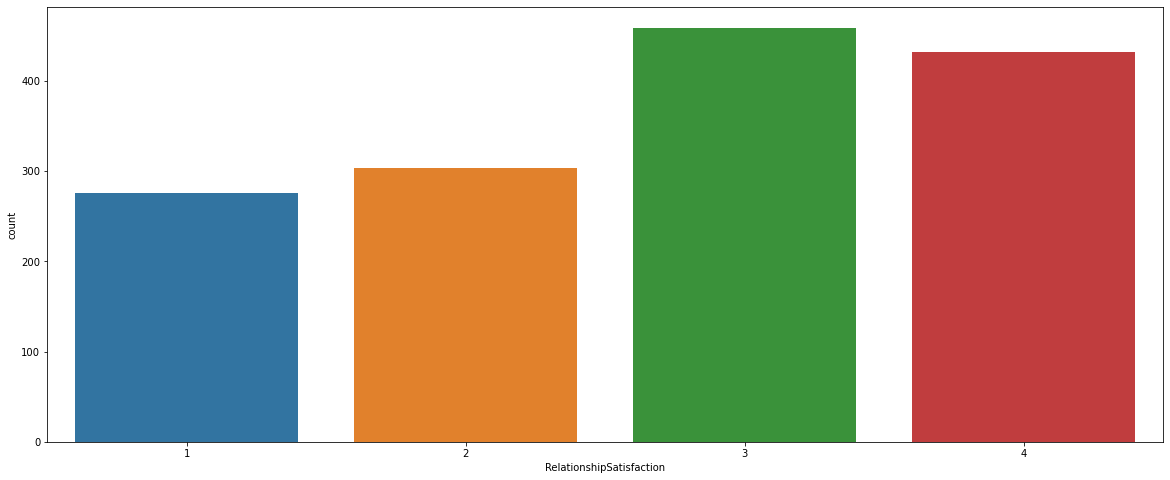

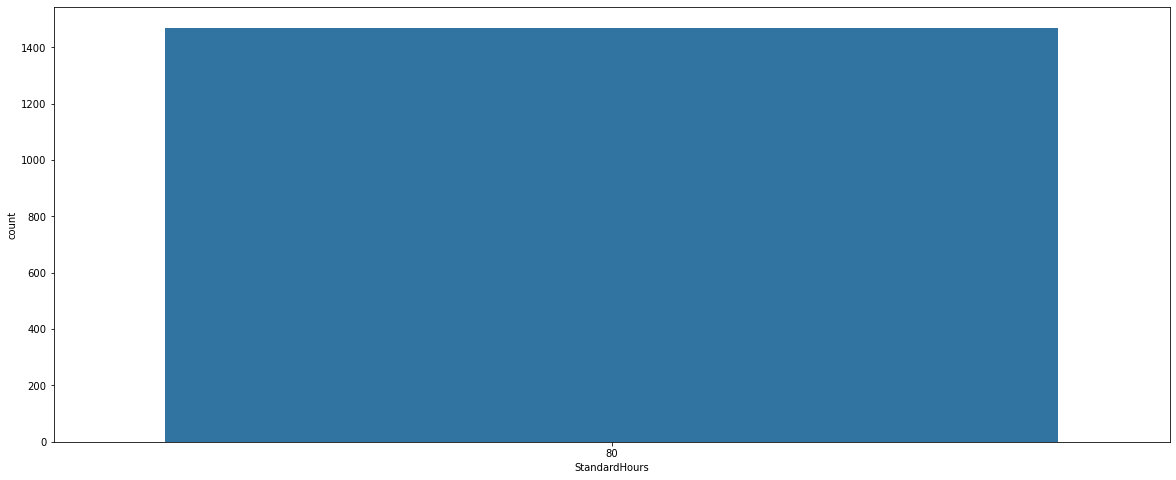

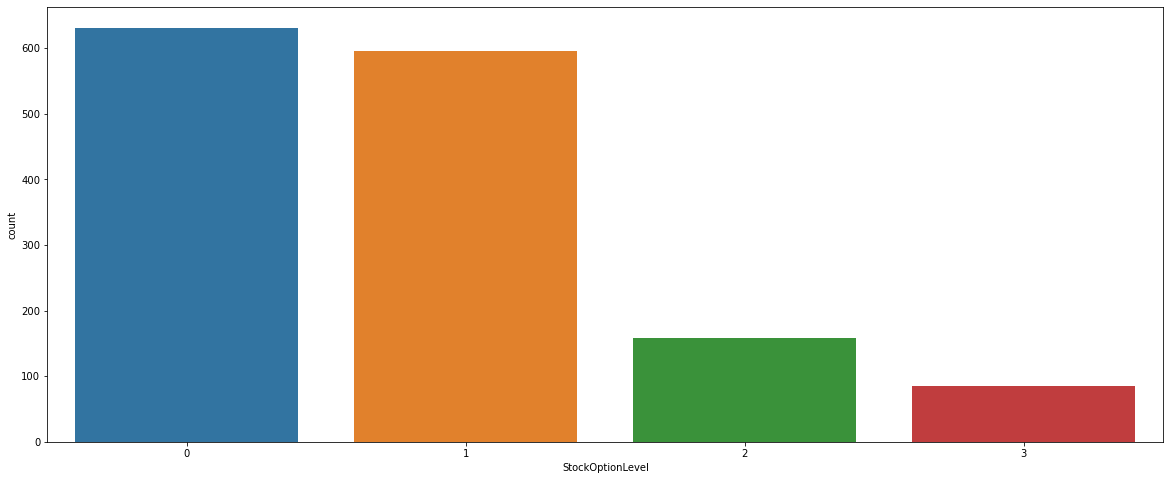

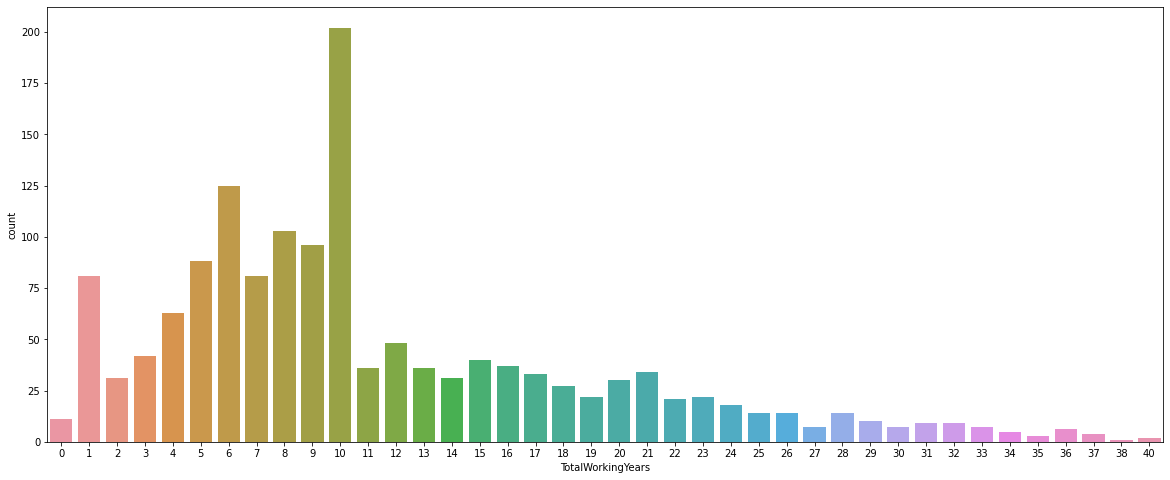

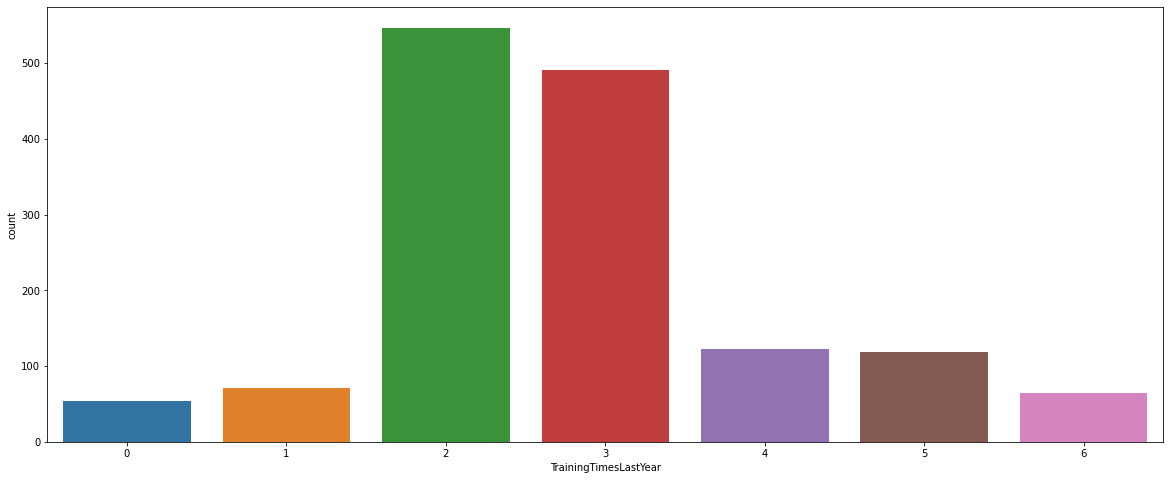

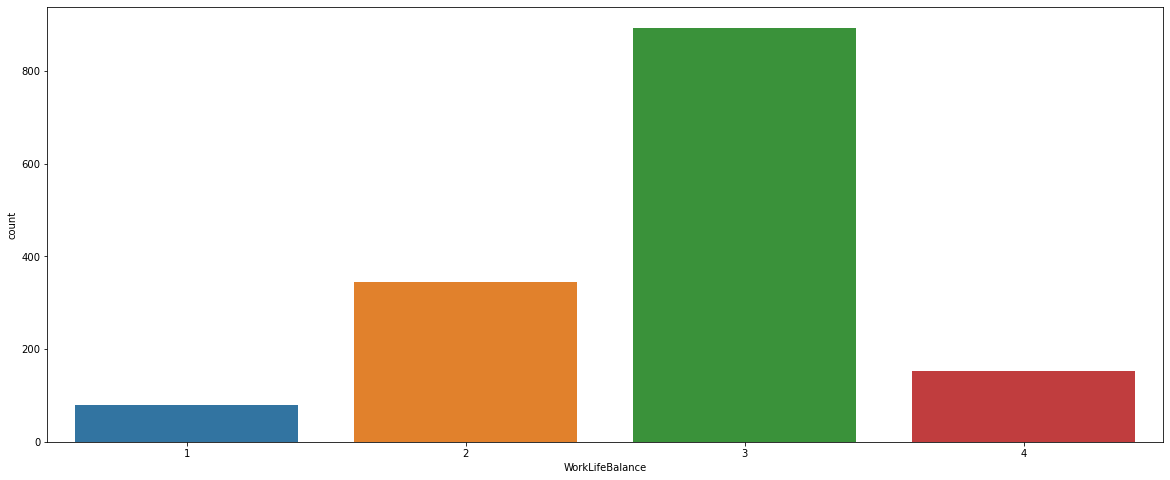

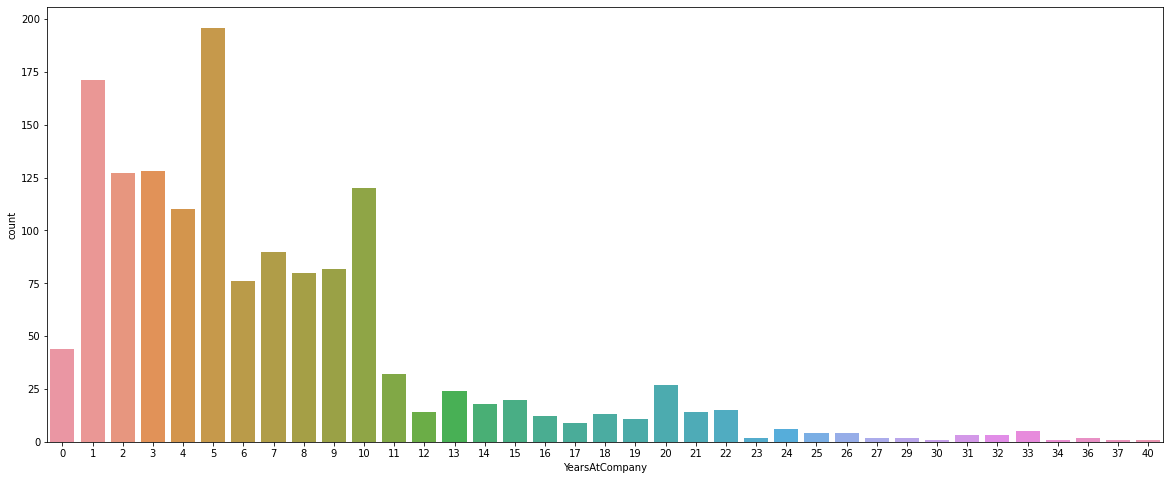

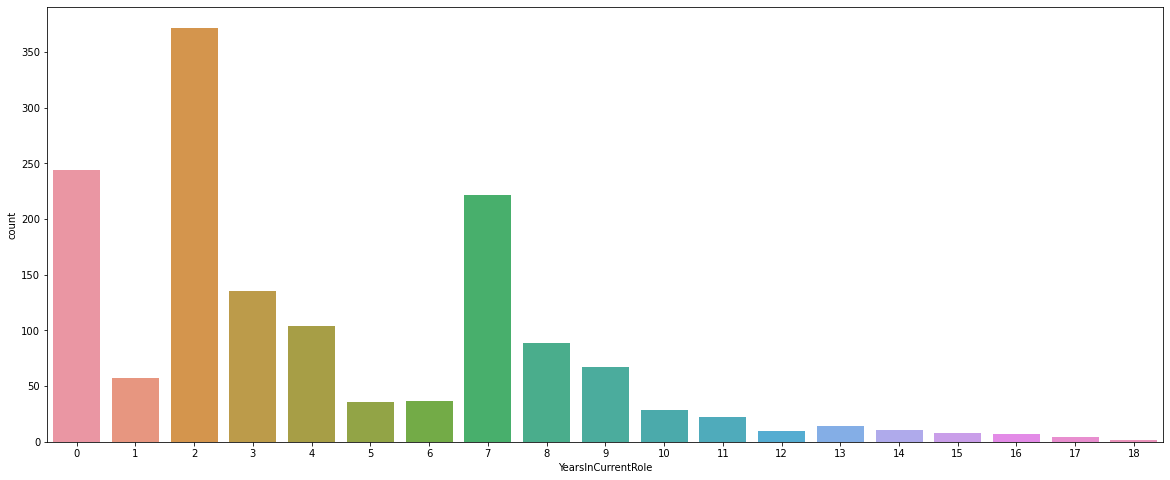

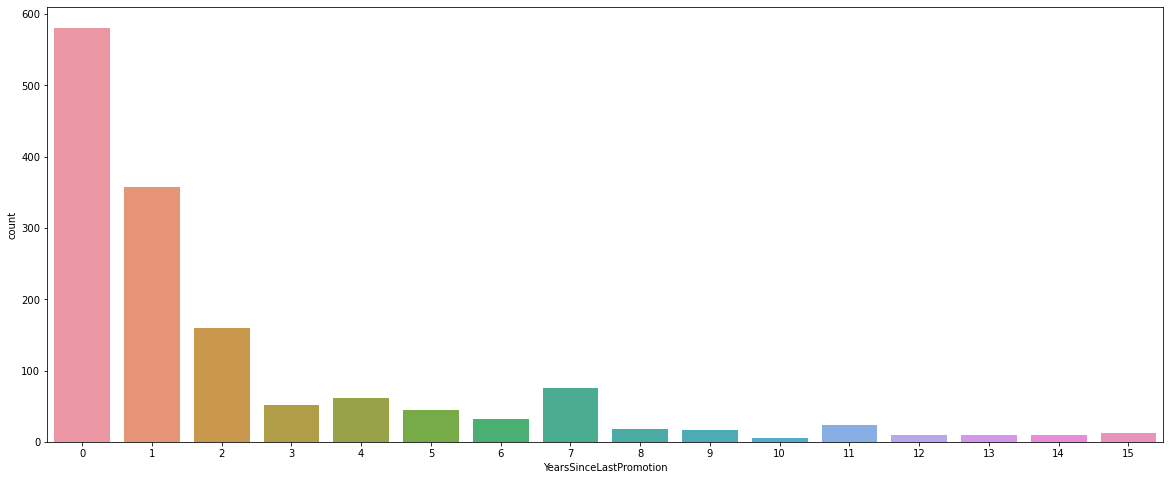

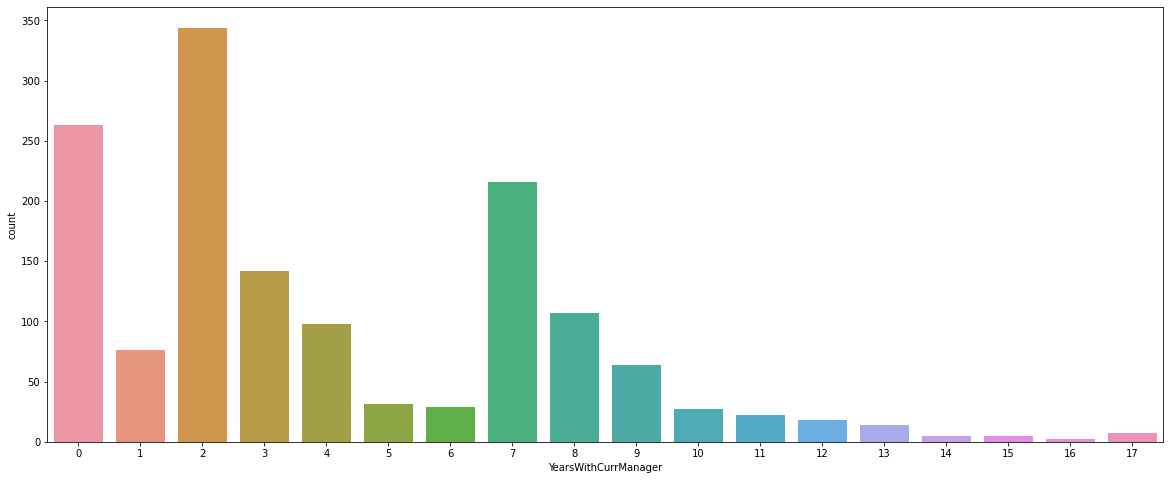

In [10]:
for i in df.columns:
    plt.figure(figsize=(20,8))
    sns.countplot(i,data=df)
    plt.show()

we can observe from the above plotting-

1)attrition rate is very high and many employees have left the company.

2)many of the employees work from office as the there is huge numbers of employees who work from office and travel rarely

3)maximum number of employeess are from R&D department, followed by sales and then HR

4)maximum number of employees are with 3 education degrees followed by 4,2,1 and then 5.

5)maximum number of employees are from Life Science domain followed by modeical, and then marketing, technical degree and at last HR field.

6)males employees are higher than female employees.

7)most of the employees are from job level 1 & job level 2.

8)majority of the employees are from Sales executive, then research scientist, technician, then MD, Healthcare represntative, then manager, sales person, then RD and at last HR team.

9)most of the employees are married.

10)maximum number of employees in this company has previously worked in one firm.

11)most of the employees are training time last year is in between 2 & 3.

In [11]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

We can clearly see that out of 1470 total employees 1233 have attrition -no(doesnt leave the company) and 237 have 
attrition- yes (left the company)

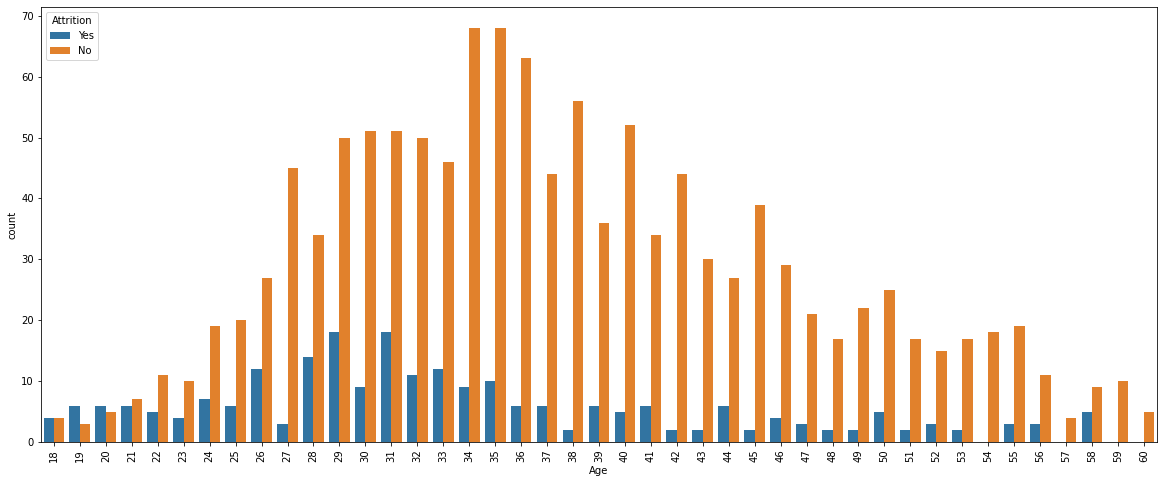

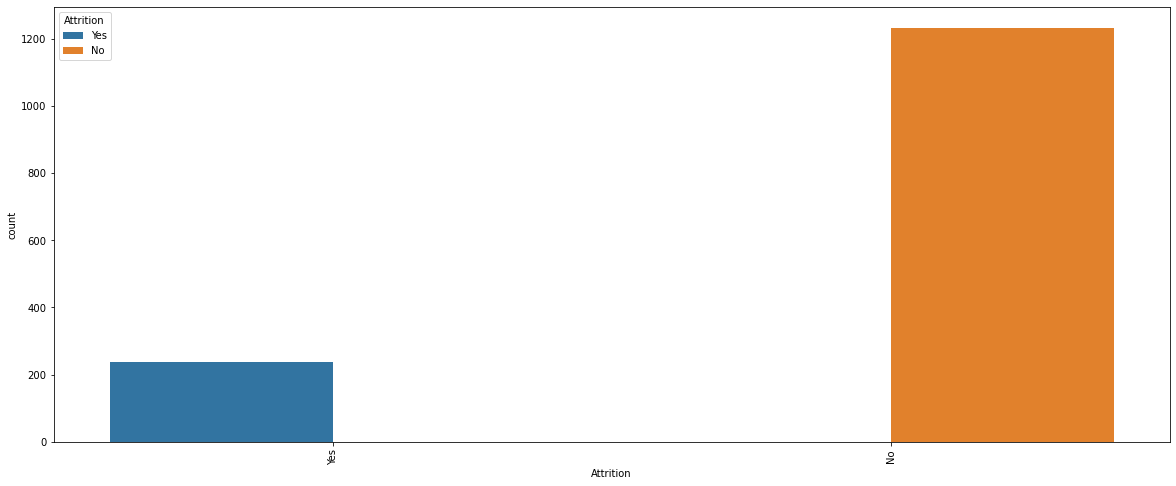

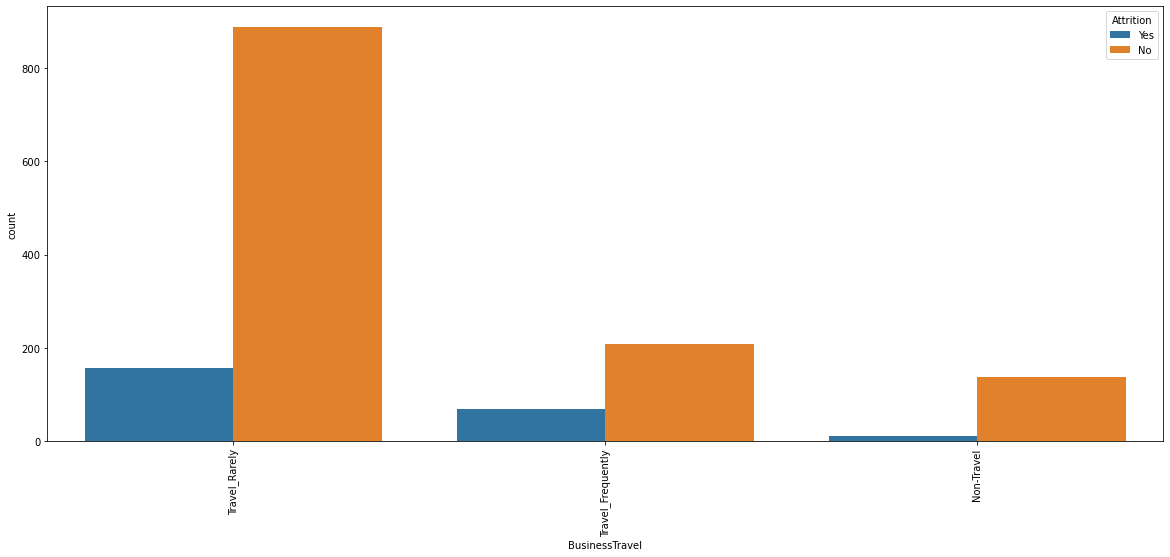

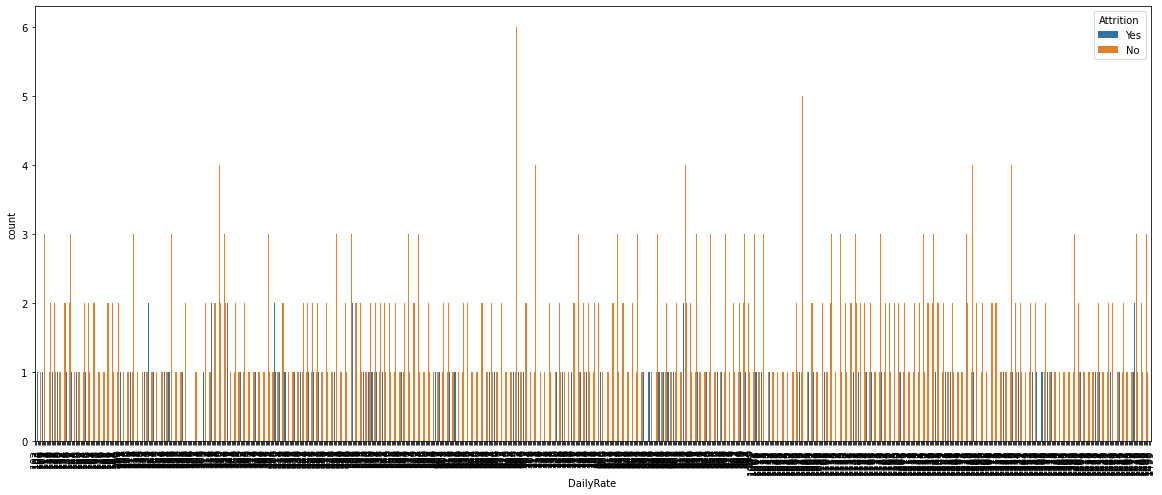

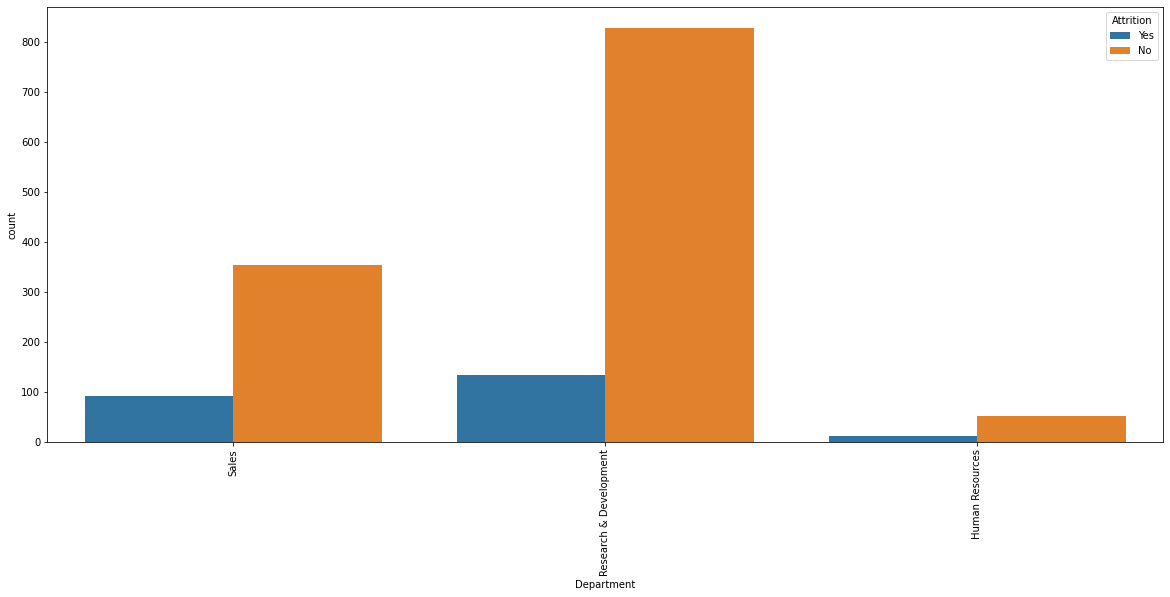

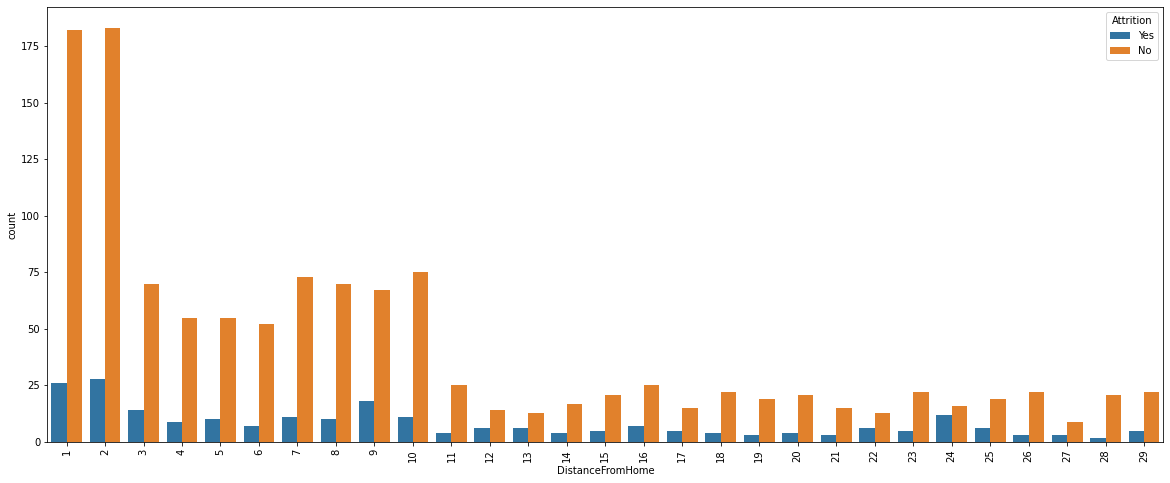

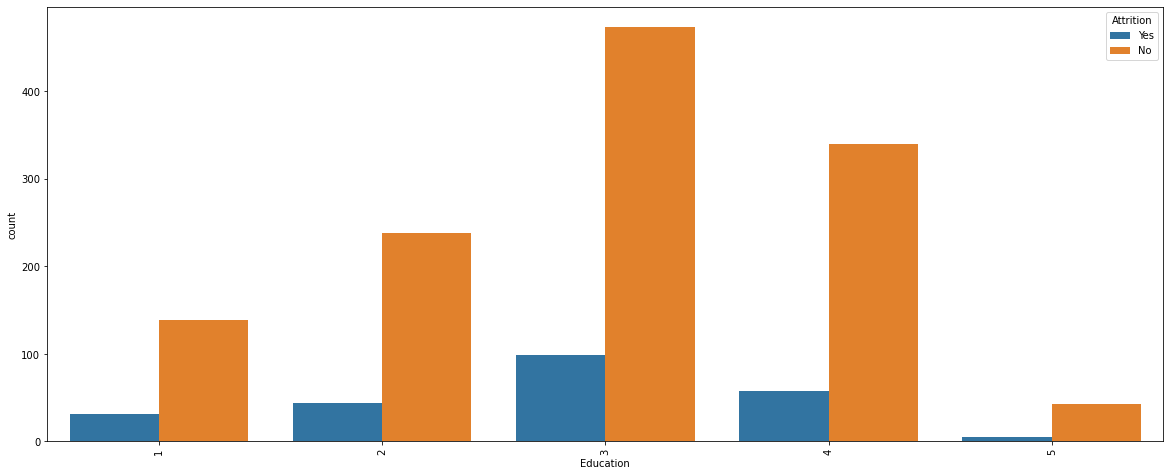

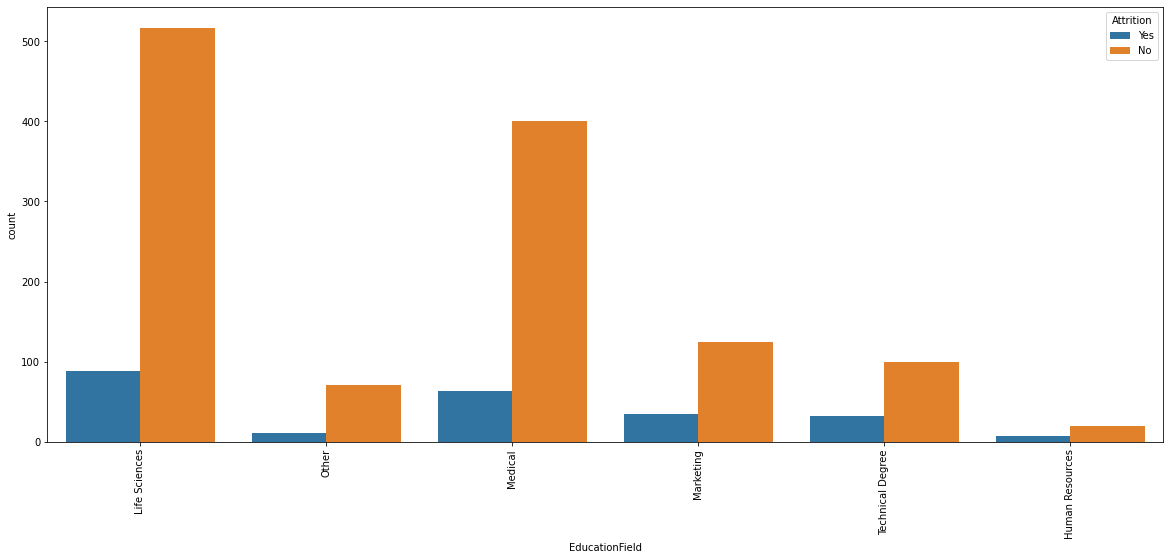

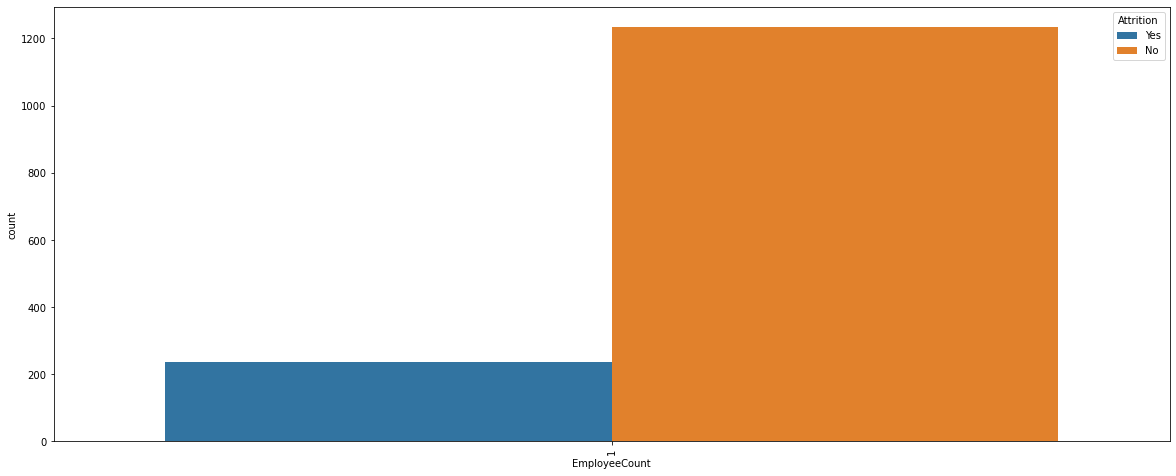

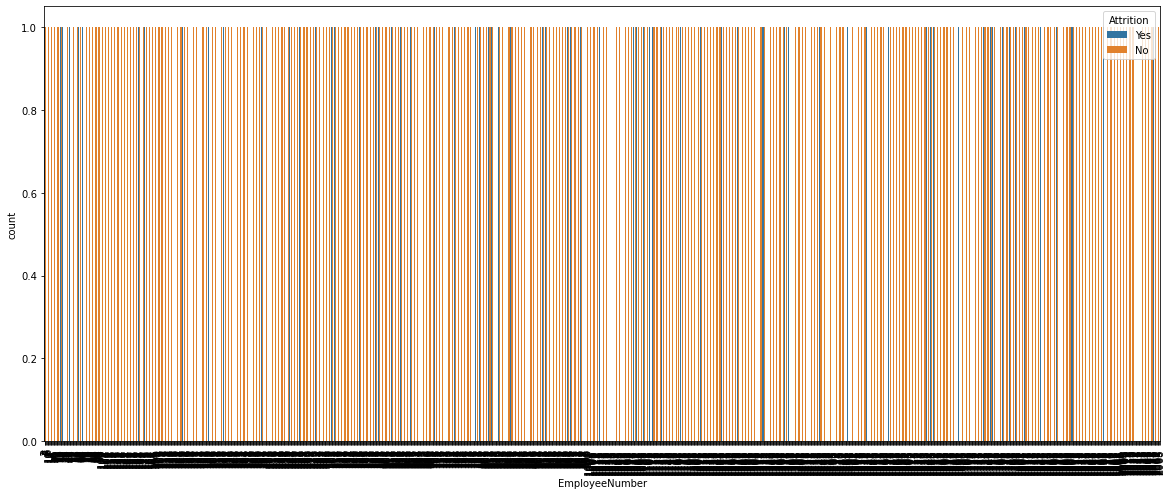

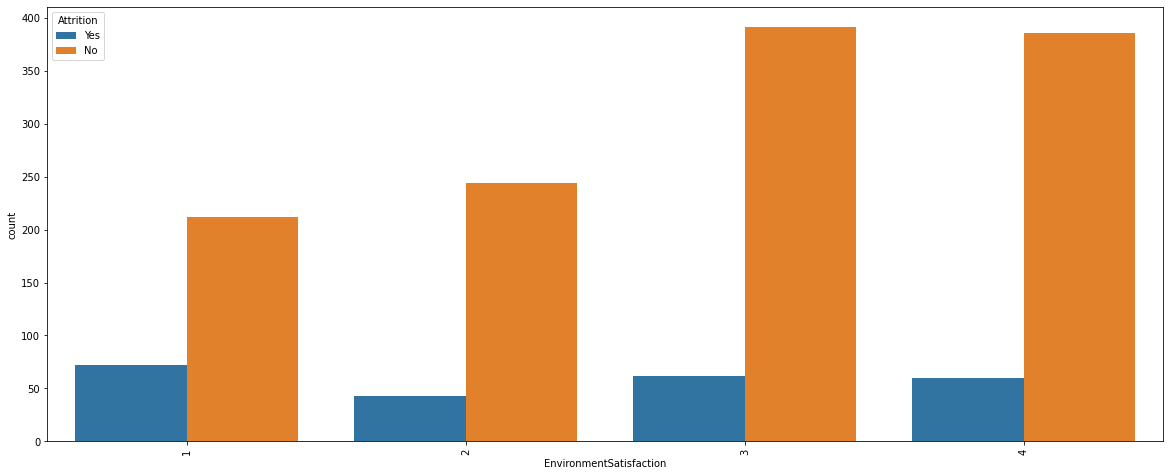

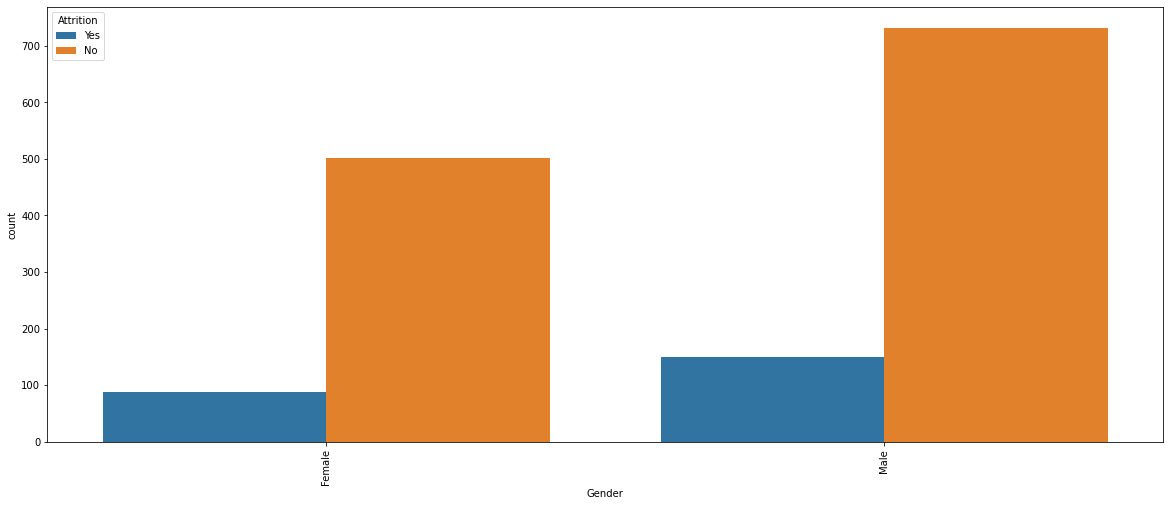

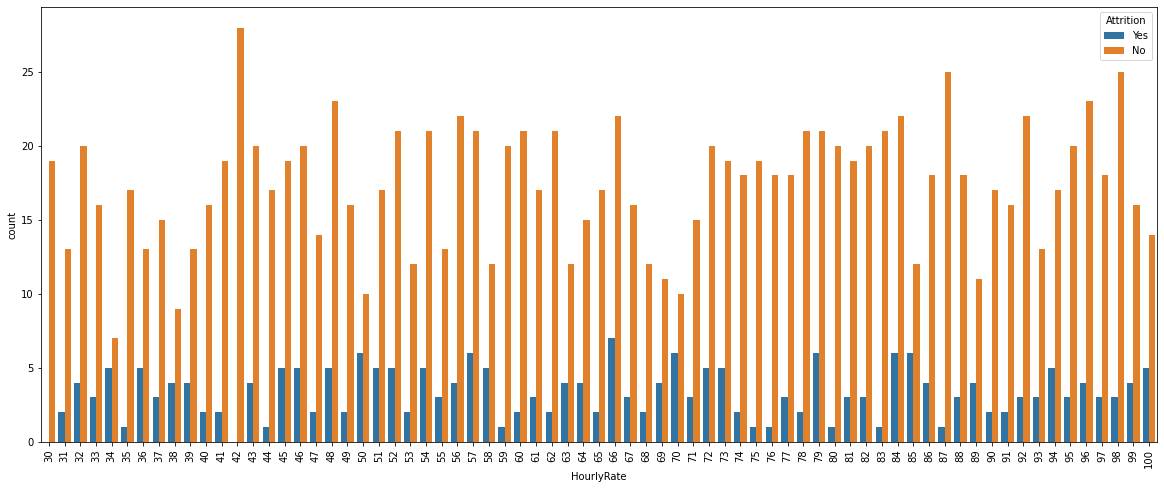

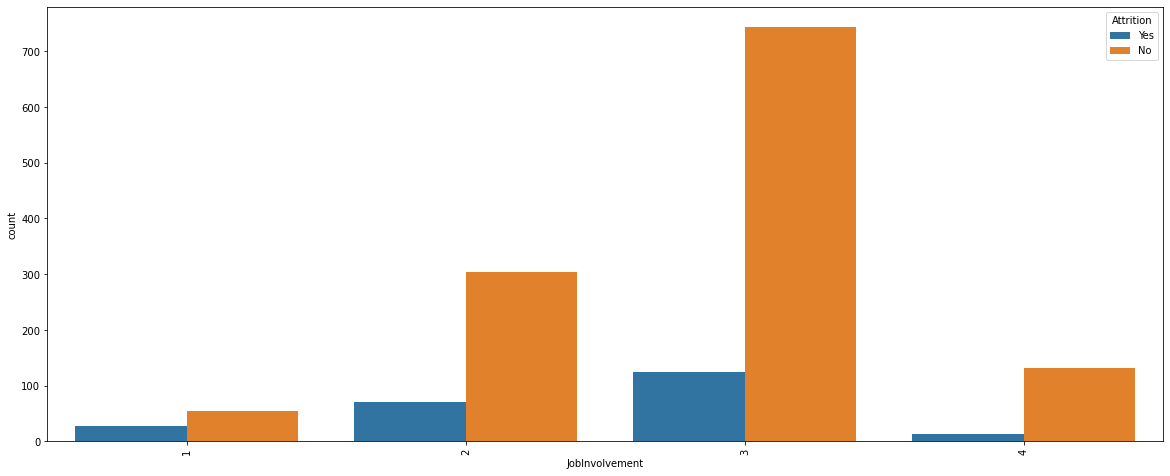

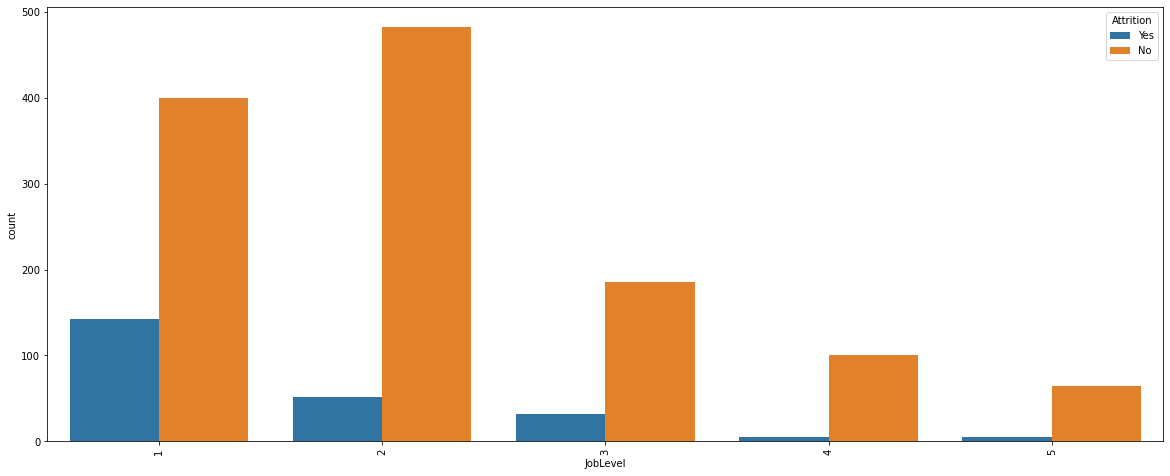

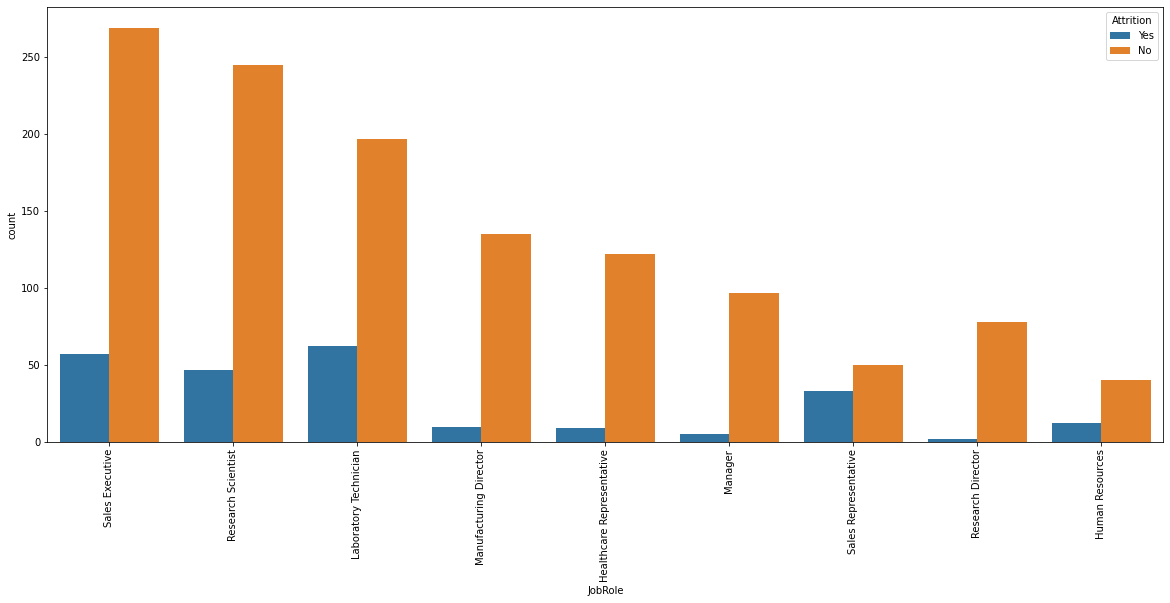

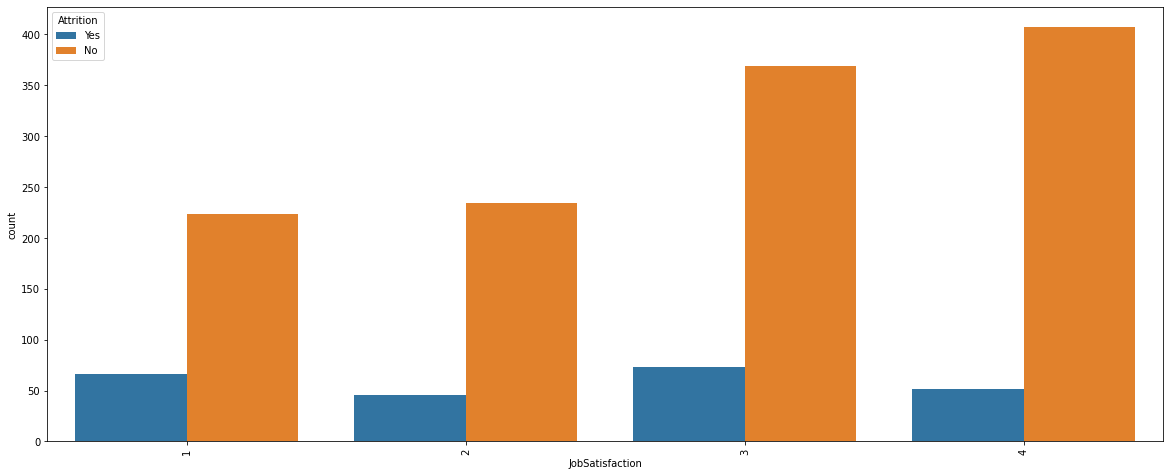

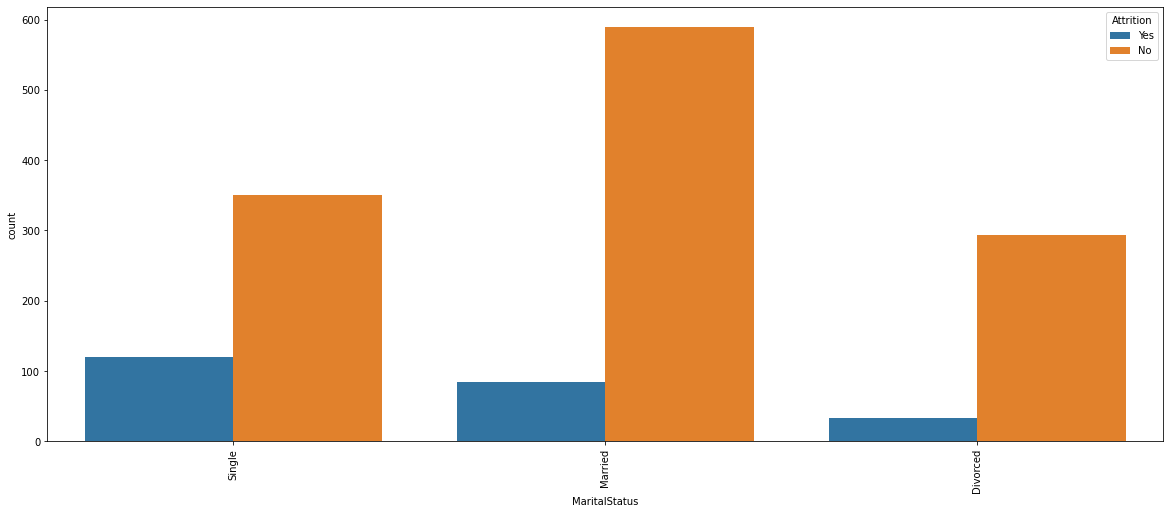

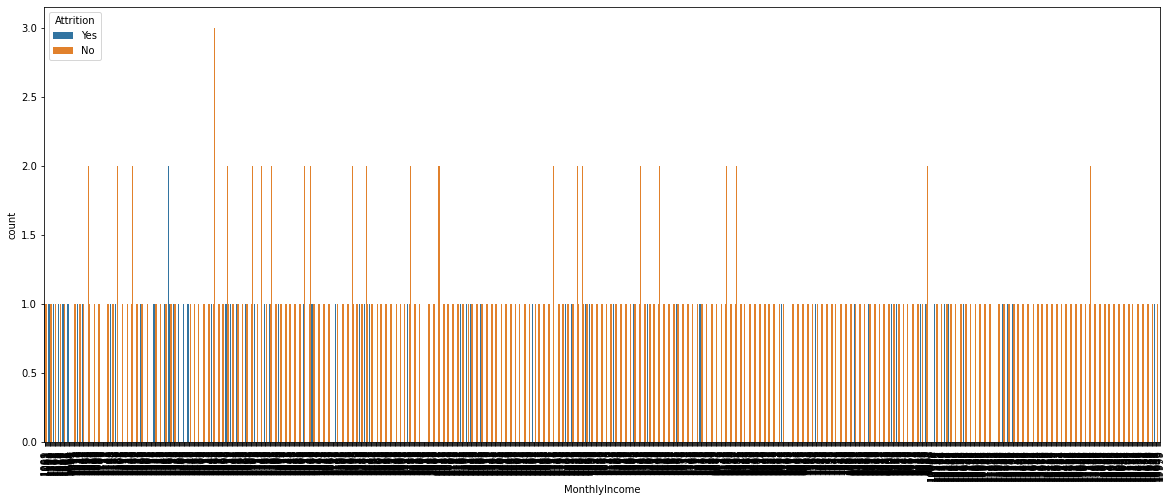

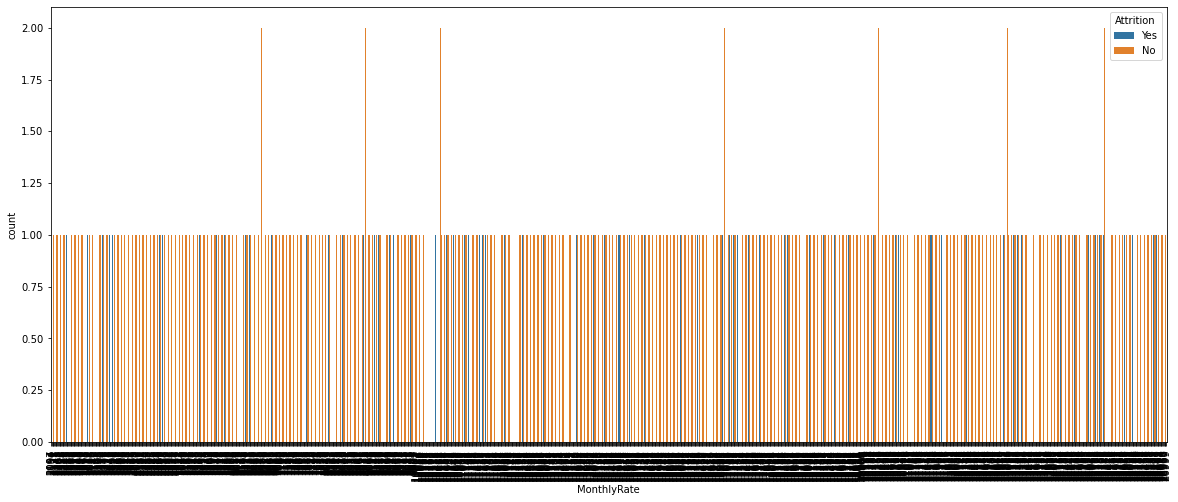

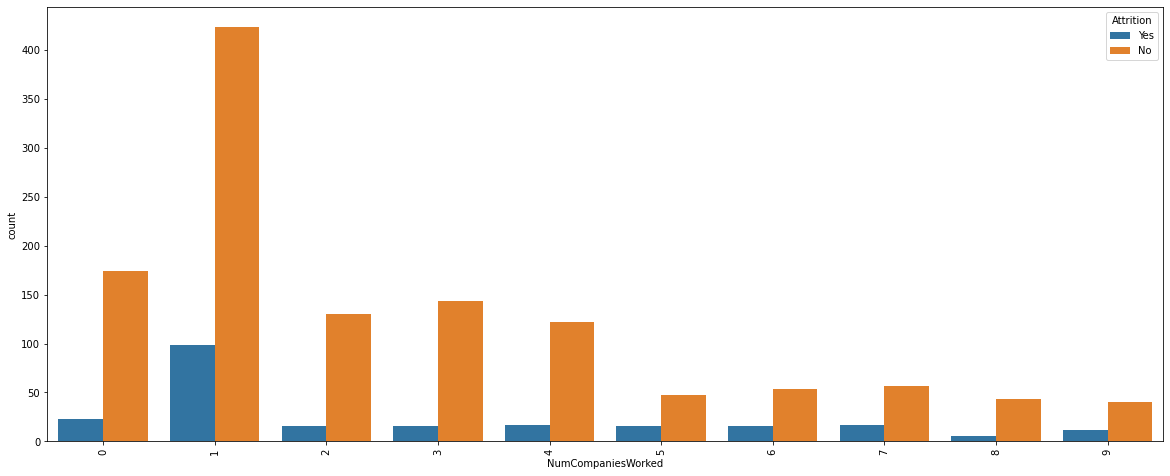

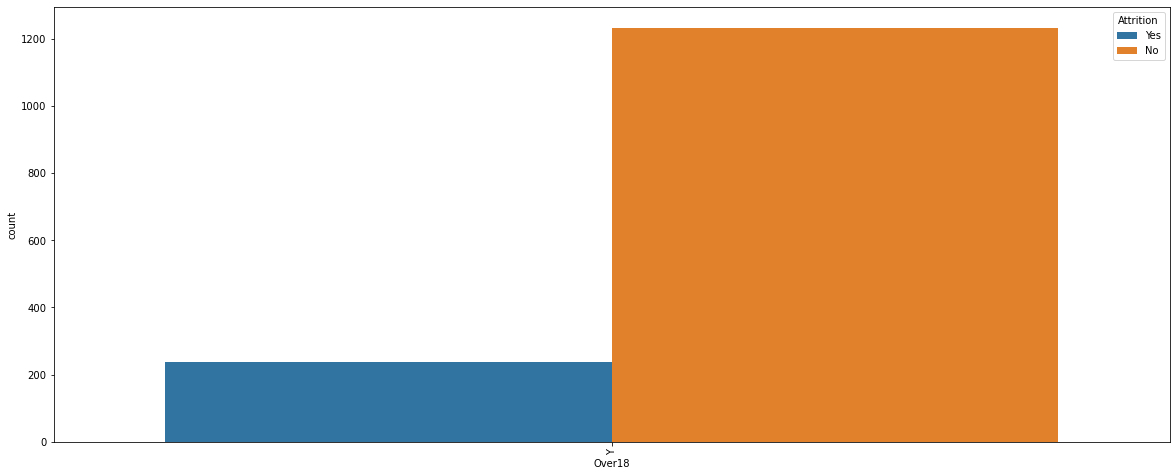

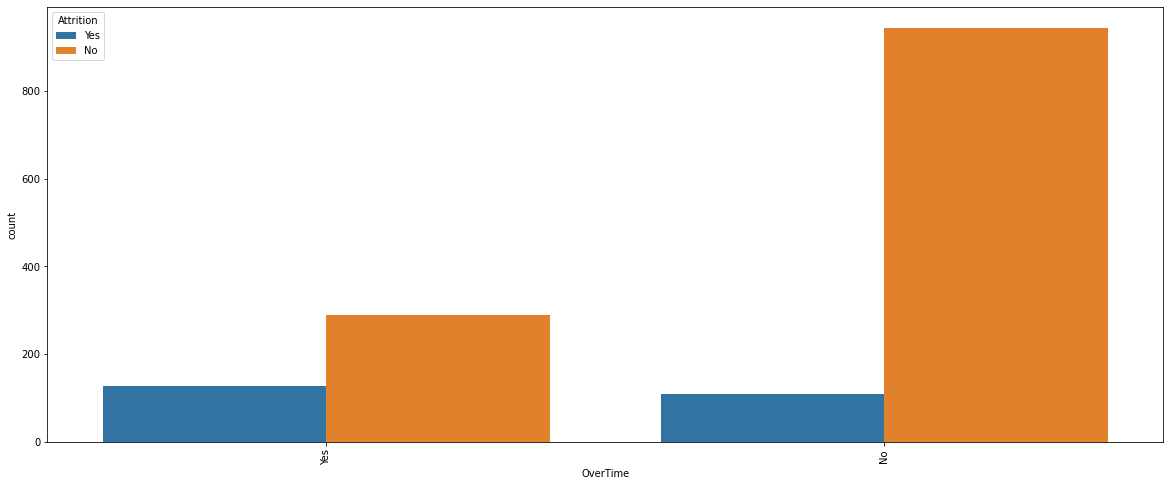

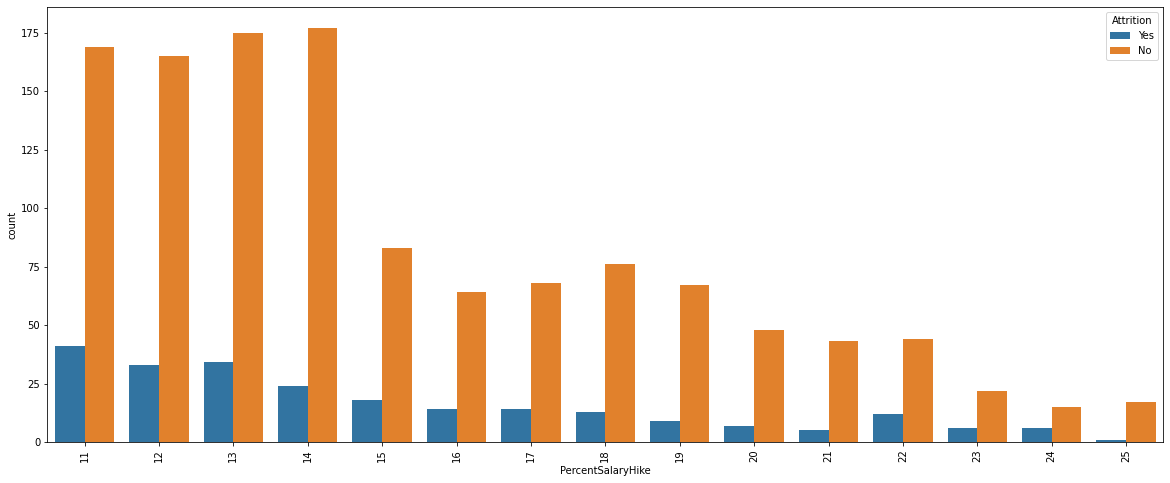

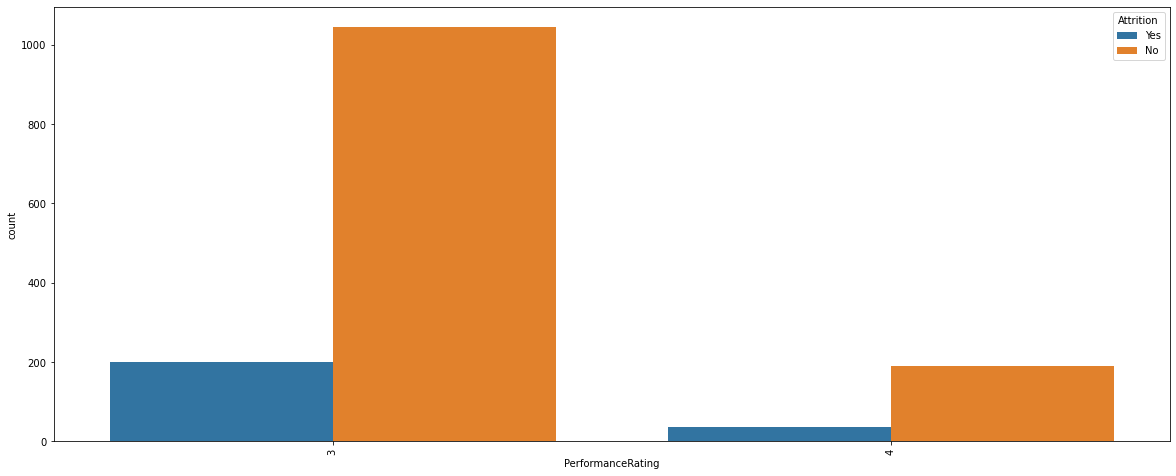

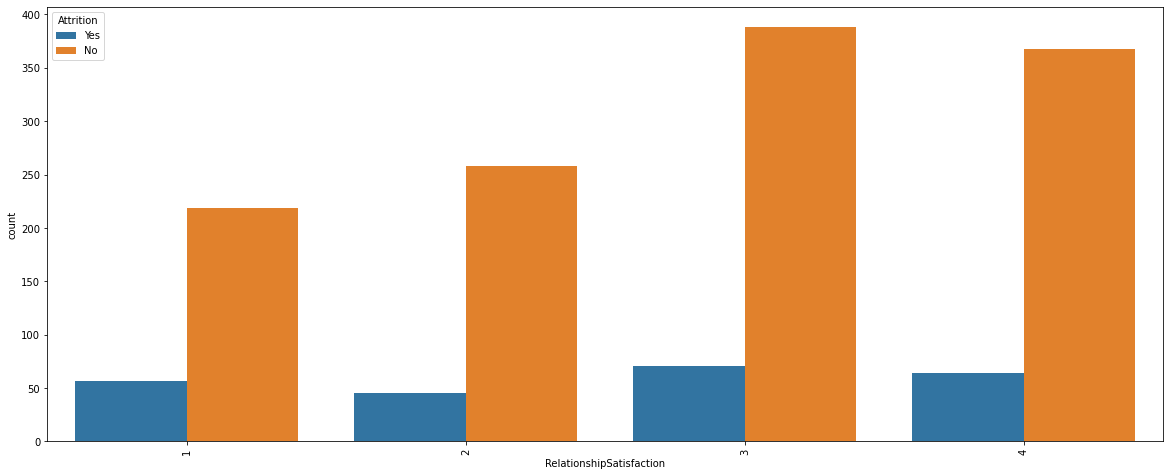

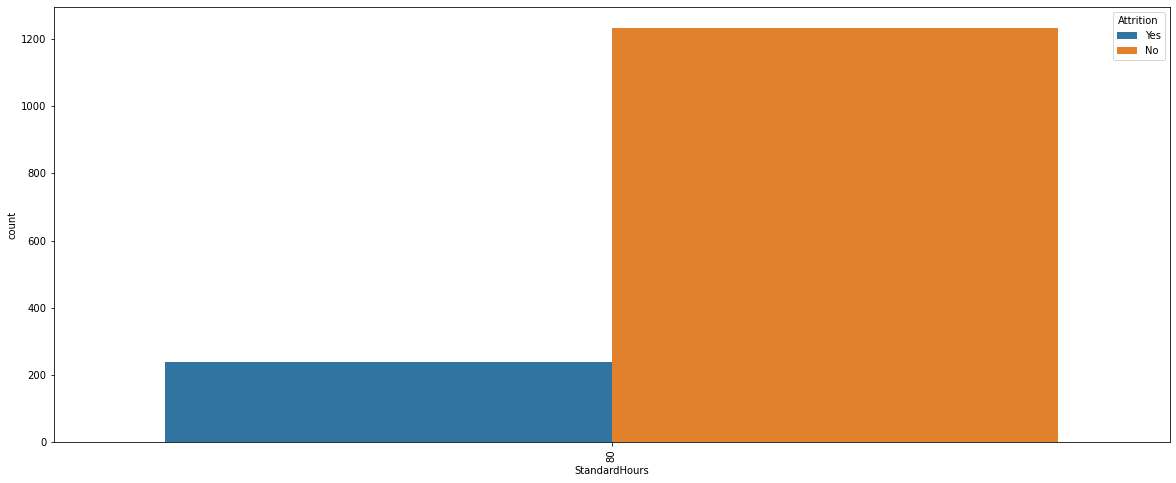

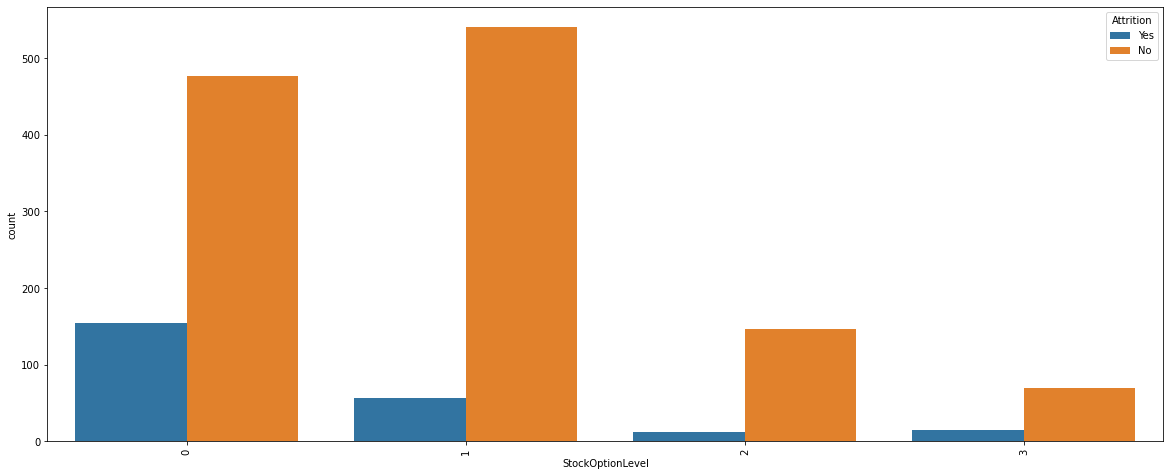

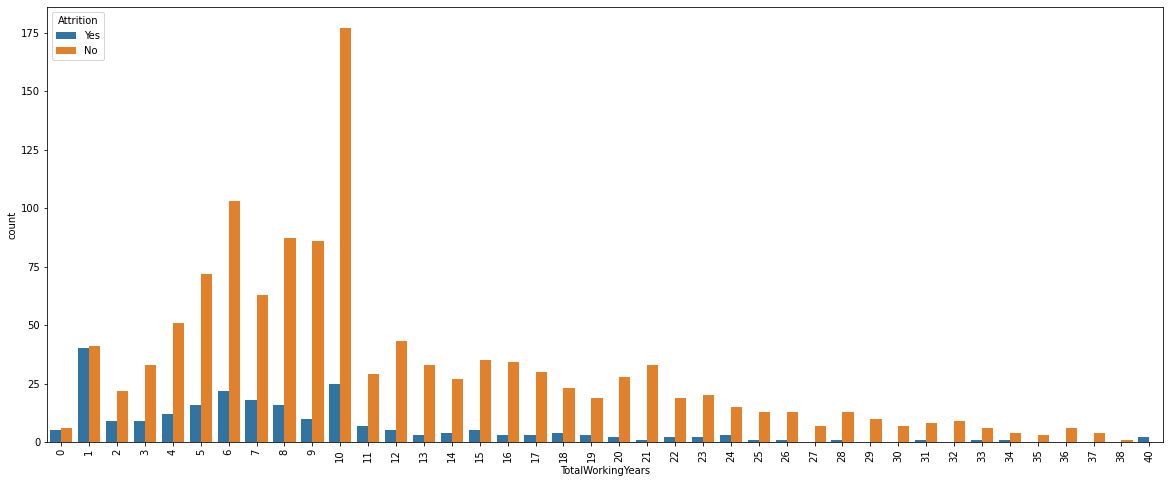

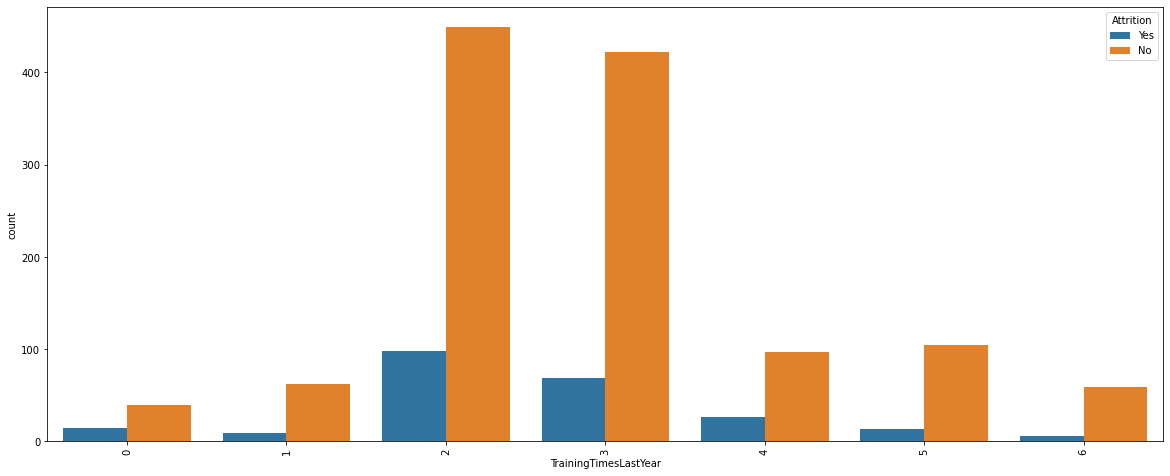

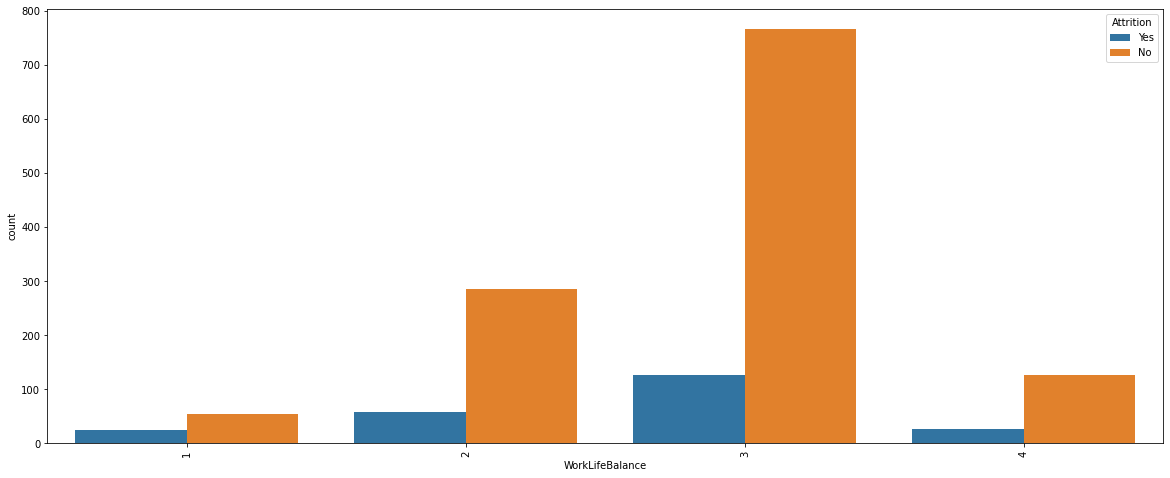

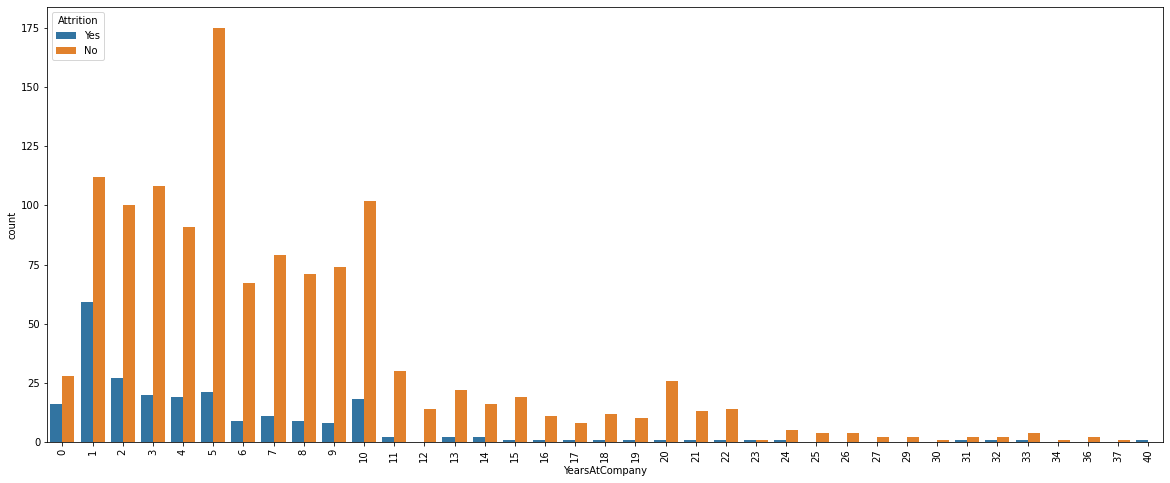

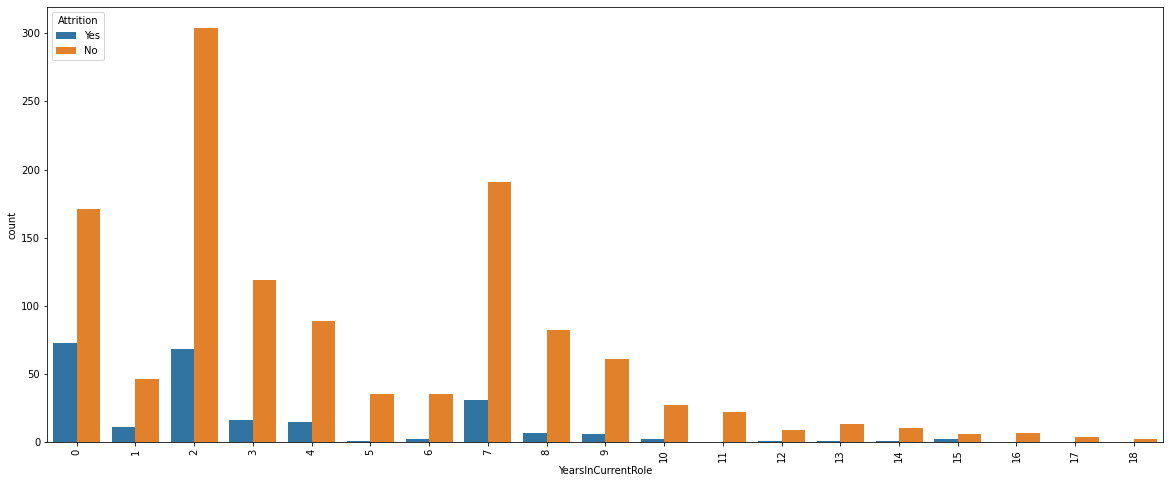

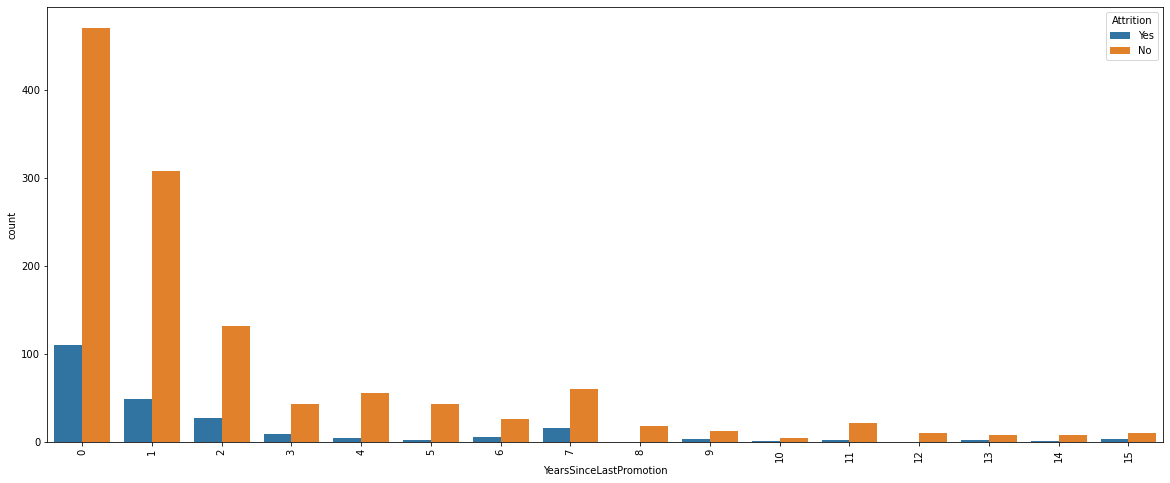

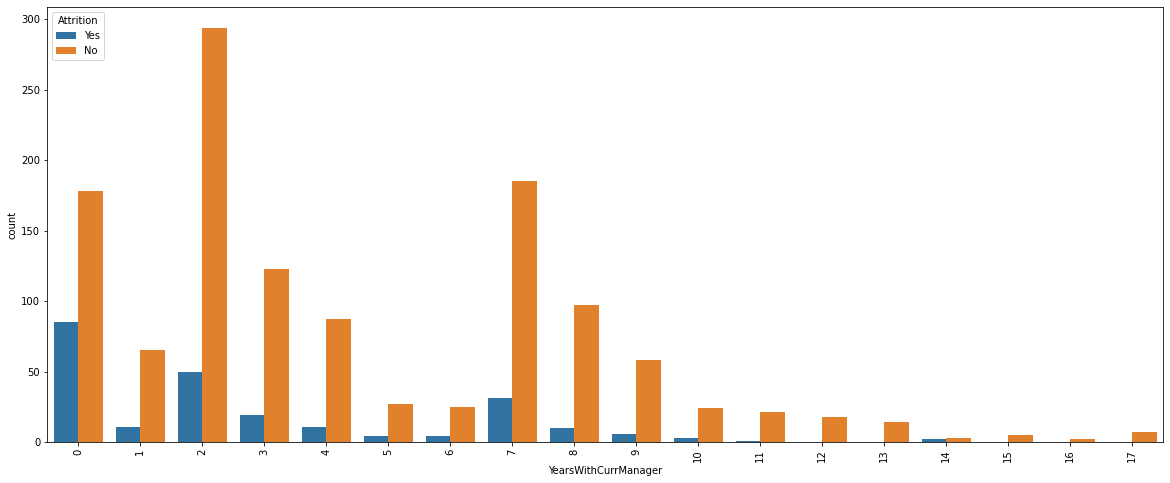

In [12]:
for i in df.columns:
    plt.figure(figsize=(20,8))
    sns.countplot(x=df[i],hue='Attrition',data=df)
    plt.xticks(rotation=90)
    plt.show()

From the above plotting of the features with the target['attribute']-

1)Employees having age in between 28-33 years tends to leave the company than other age group.

2)The employees who travel rarely have left the company more than those who had travelled frequently or had not travelled.

3)Employees who's education level is 3 and level 4 have left the company other than employees having  other educational level.

4)Employees with education field of science either life science or medical tends to leave the company than other education fields.

5)Employees having job involvement level 3 are more likely to leave the company.

6)Employees with job level 1 are more likely to leave the company.

7)Most of the employees from sales department & technical department leaving the compnay.

8)Such employees whose this is second company are more likely to leave.

9)Employees with salary hike from 11%-14% are more likely to leave the company, employees having high salary hike opted to stay in the same company.

# Correlation

In [13]:
print('Data description')
df.describe().T

Data description


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


we can observe from the above desscription-

1)The minimum age is 18 and maximum is 60. Average age of employees is 36 years.

2)Daily rates of employee vary from 102 to 1499.

3)Maximum distance of a employee's home from office is 29km.

4)Employee count is 1 in all the columns.

5)Hourly rates vary from 30 to 100.

6)Monthly rate vary from 2094 to 26999.

7)Number of Companies Worked vary from 0 to maximum of 9.

8)Monthly income ranges from 1009 to 19999.

9)Percentage of salary hike vary from 11% to maximum 25%.

10)Standard hours are 80hrs.

11)Total working years at company is 40 years, it means that the oldest employee of the company is working from last 40 years in the company.

12)Standard Deviation is maxium for the MonthlyIncom & MonthlyRate.

13)After observing the 75% and 100% we can say that there are not so vast difference, therefore no outliers present in the dataset

In [14]:
#dropping few columns after the observations-
print("droppng unnessary columns from datasets")
df.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'],inplace=True,axis=1)

droppng unnessary columns from datasets


EmployeeNumber doesnot make any sense for attrition, and all other three columns are same for all datasets rows.

In [15]:
df.shape

(1470, 31)

<AxesSubplot:>

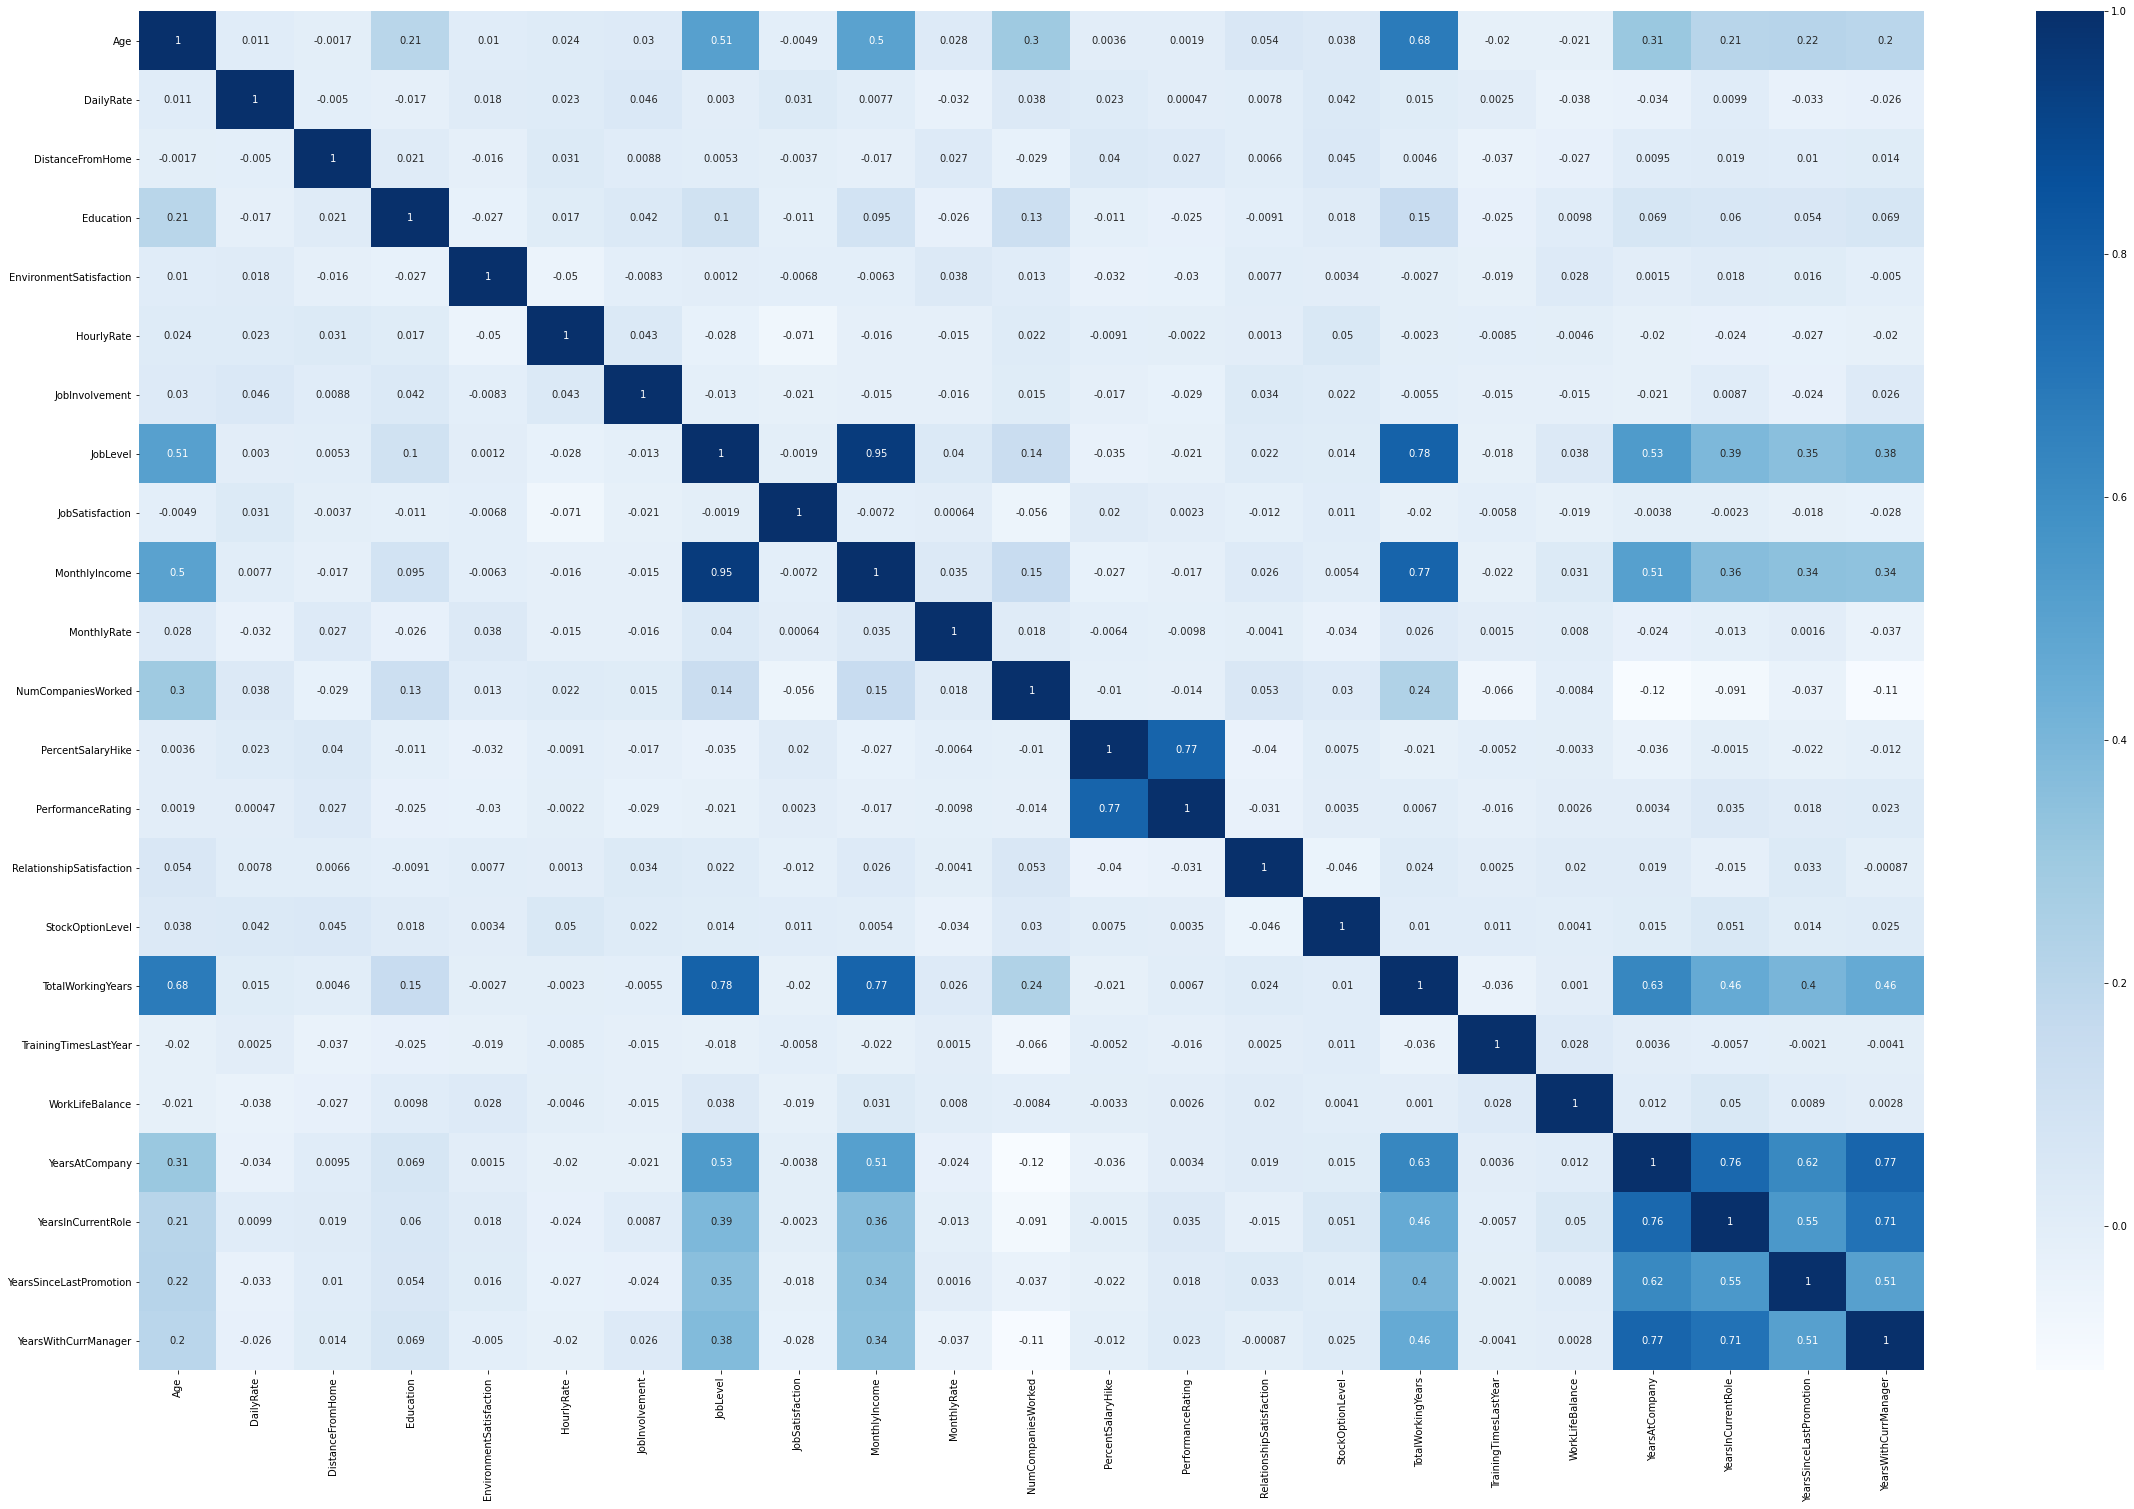

In [16]:
plt.figure(figsize=(40,25))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

We can see clearly from the heatmap correlation-

1)Month income is also correlated with the job level it means higher management is getting more salary

2)PerformanceRating is highly related to PercentSalaryHike which is expected.

3)Years With Current Manager is highly related to Years at Company

4)Years at company is high correlation with years in current role.

# Data Cleaning

# Outlier checking

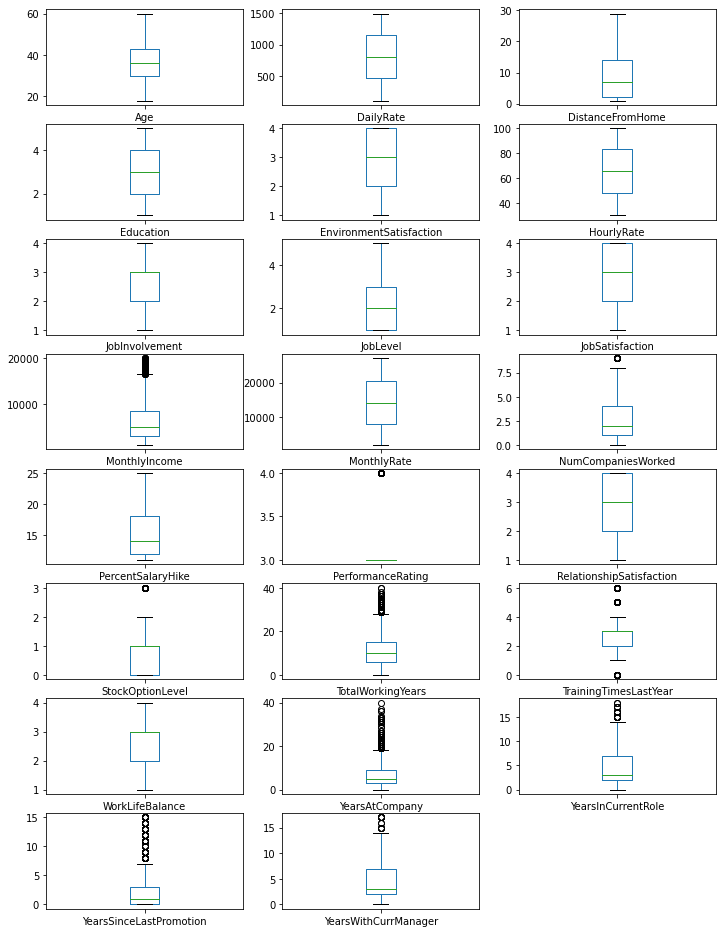

In [17]:
df.plot(kind='box',subplots=True,layout=(12,3),figsize=(12,25))
plt.show()

As we can most of the columns, outliers are very close to the maximum range only two columns  stockoptionlevel & performance rating are having one ouitlier.

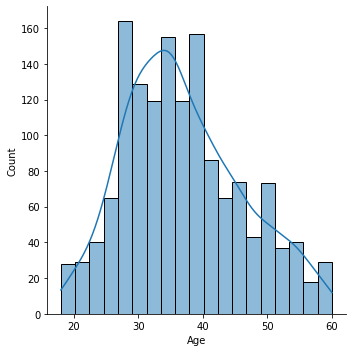

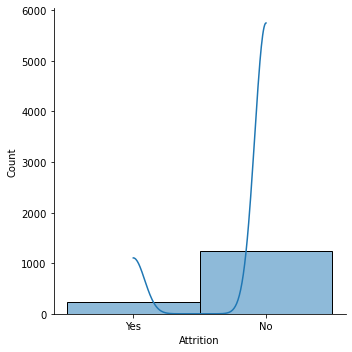

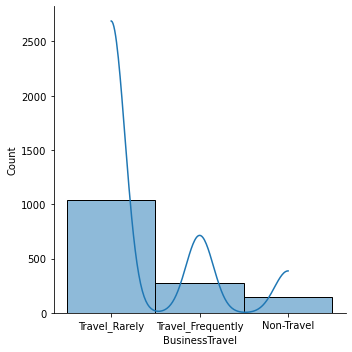

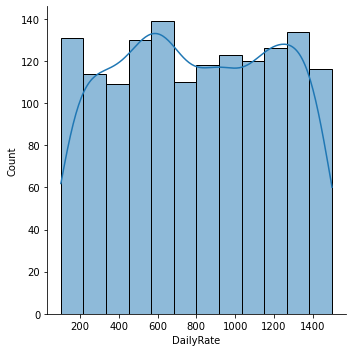

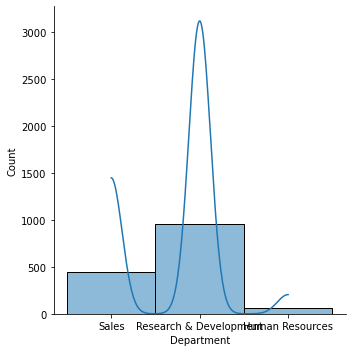

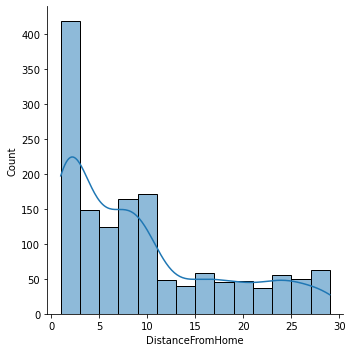

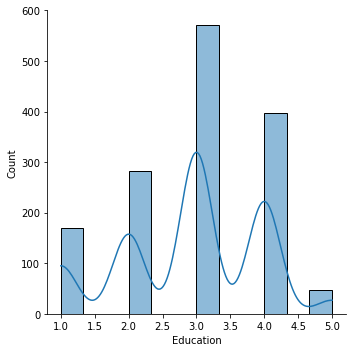

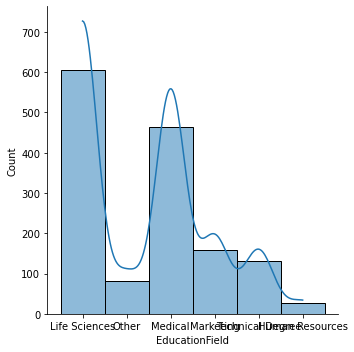

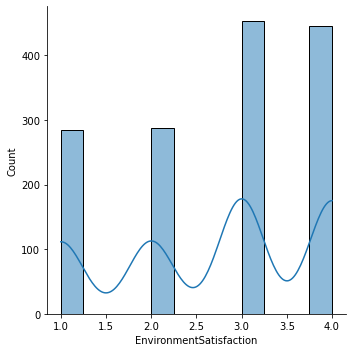

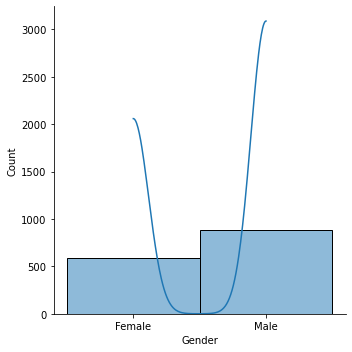

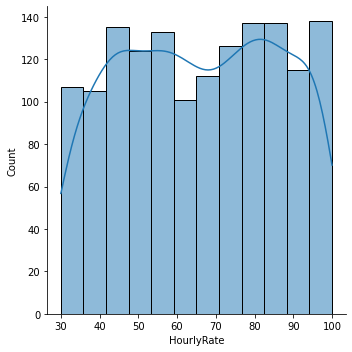

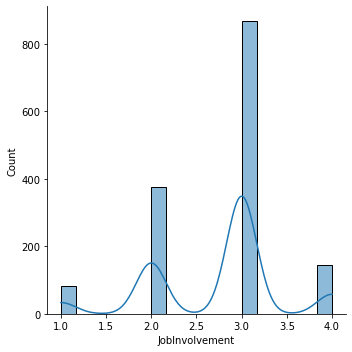

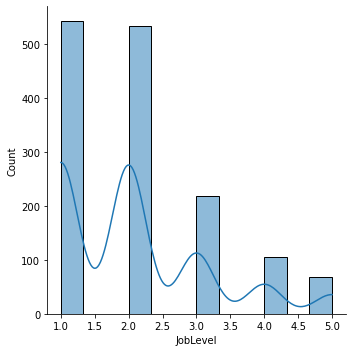

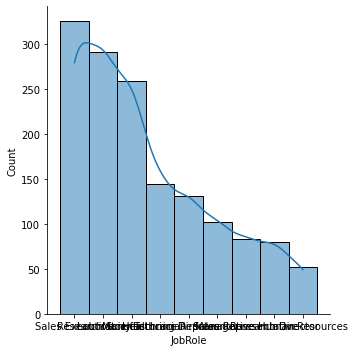

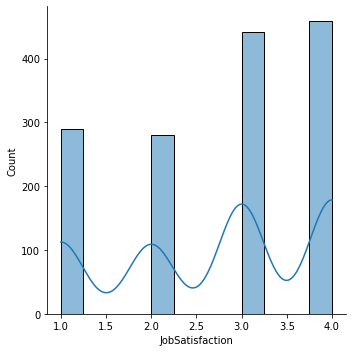

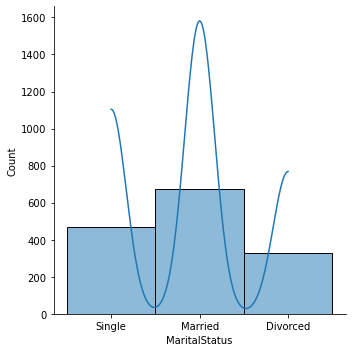

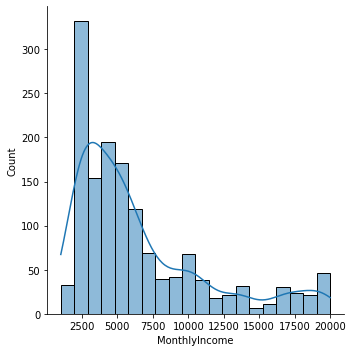

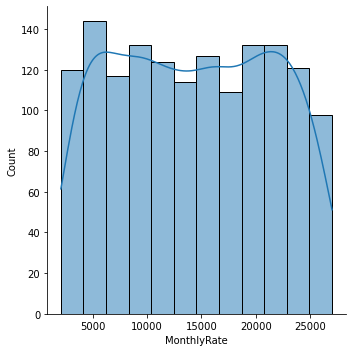

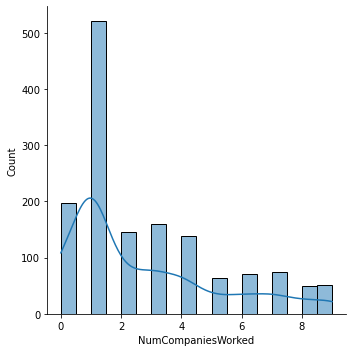

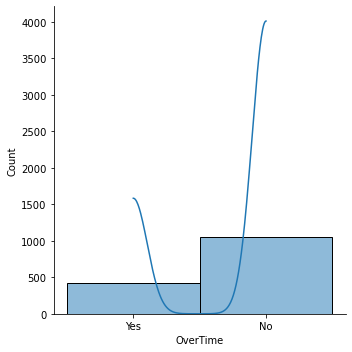

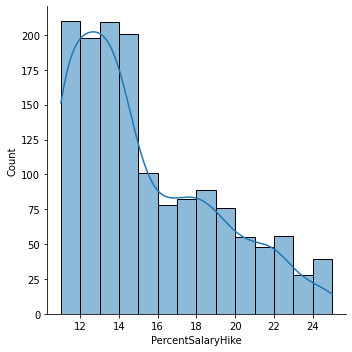

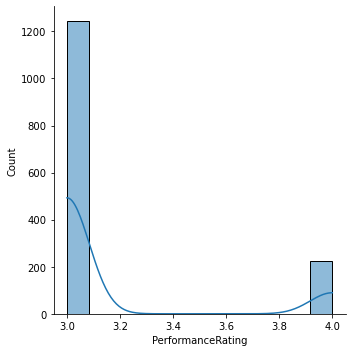

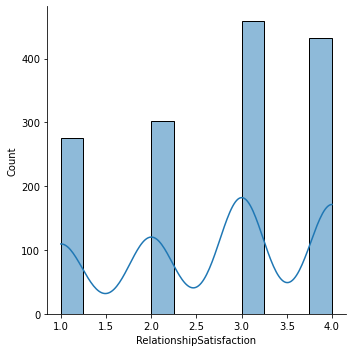

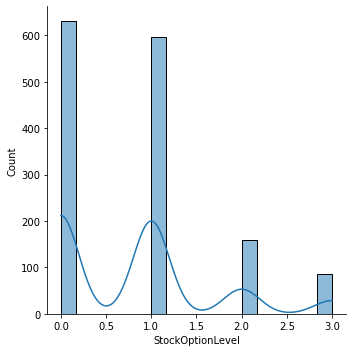

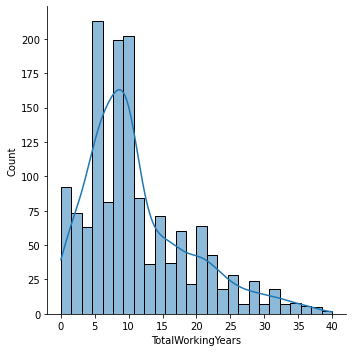

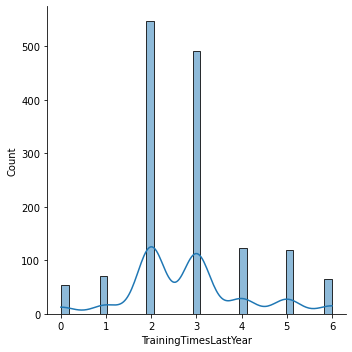

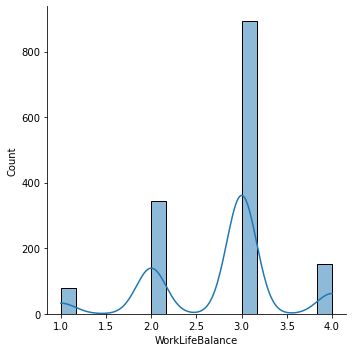

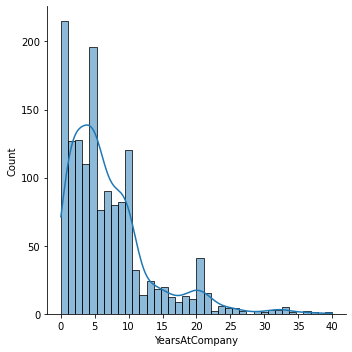

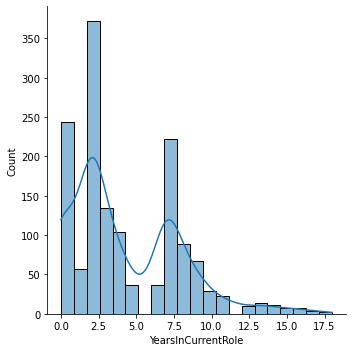

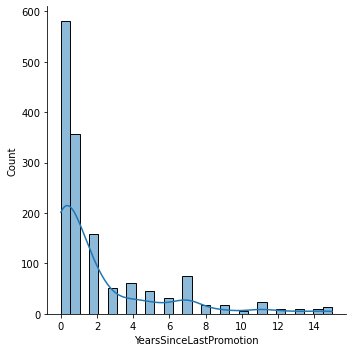

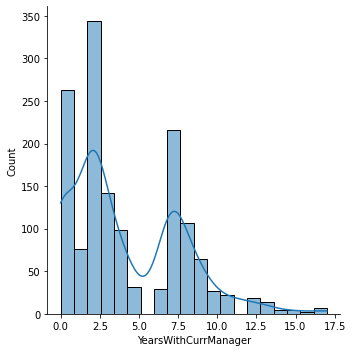

In [20]:
for i in df.columns:
    sns.displot(df[i],kde=True)
    plt.show()

we can clearly see from the above plotting-

1- Total Worling hours, Monthly income, Distance from home, Years in promotion,Percent Salary Hike,Years since last promotion are skewed toward right side.

2- Data are not normally distributed in the dataset.

We have to encode our datets using label encoder as there are few objects types columns also.

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
features=list()

In [22]:
for column in range(len(df.columns)):
    df[df.columns[column]]=le.fit_transform(df[df.columns[column]])
    features_dict={index: label for index, label in enumerate(le.classes_)}
    features.append(features_dict)

In [23]:
features

[{0: 18,
  1: 19,
  2: 20,
  3: 21,
  4: 22,
  5: 23,
  6: 24,
  7: 25,
  8: 26,
  9: 27,
  10: 28,
  11: 29,
  12: 30,
  13: 31,
  14: 32,
  15: 33,
  16: 34,
  17: 35,
  18: 36,
  19: 37,
  20: 38,
  21: 39,
  22: 40,
  23: 41,
  24: 42,
  25: 43,
  26: 44,
  27: 45,
  28: 46,
  29: 47,
  30: 48,
  31: 49,
  32: 50,
  33: 51,
  34: 52,
  35: 53,
  36: 54,
  37: 55,
  38: 56,
  39: 57,
  40: 58,
  41: 59,
  42: 60},
 {0: 'No', 1: 'Yes'},
 {0: 'Non-Travel', 1: 'Travel_Frequently', 2: 'Travel_Rarely'},
 {0: 102,
  1: 103,
  2: 104,
  3: 105,
  4: 106,
  5: 107,
  6: 109,
  7: 111,
  8: 115,
  9: 116,
  10: 117,
  11: 118,
  12: 119,
  13: 120,
  14: 121,
  15: 124,
  16: 125,
  17: 128,
  18: 129,
  19: 130,
  20: 131,
  21: 132,
  22: 134,
  23: 135,
  24: 136,
  25: 138,
  26: 140,
  27: 141,
  28: 142,
  29: 143,
  30: 144,
  31: 145,
  32: 146,
  33: 147,
  34: 148,
  35: 150,
  36: 152,
  37: 153,
  38: 154,
  39: 155,
  40: 156,
  41: 157,
  42: 160,
  43: 161,
  44: 163,
  45: 16

In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2


# Applying zscore

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1470, 31)

In [26]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int32), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [27]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1470, 31)
(1387, 31)


In [28]:
df=df_new
print(df.shape)

(1387, 31)


In [29]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

No null values are presnt.

Now we are going to split the feature column & target.

In [30]:
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

# Standard Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=sc.fit_transform(x)
x=pd.DataFrame(k,columns = x.columns)

In [32]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.705653,1.405373,-1.011249,-0.876177,-0.940815,-0.665328,-1.229911,1.388670,...,-0.424765,-1.575817,-0.929427,-0.343728,-2.171420,-2.501172,-0.022350,0.040903,-0.710699,0.368270
1,1.442111,-0.905354,-1.312393,-0.496337,-0.145521,-1.853858,-0.940815,0.251978,0.813067,-0.239091,...,2.354241,1.199034,0.238250,-0.045106,0.151871,0.336558,0.832812,0.965895,-0.310480,0.982200
2,0.083966,0.593126,1.420460,-0.496337,-0.887573,-0.876177,1.305159,1.169285,0.813067,1.290017,...,-0.424765,-0.650866,-0.929427,-0.493039,0.151871,0.336558,-1.305094,-1.192419,-0.710699,-1.166556
3,-0.368749,-0.905354,1.479698,-0.496337,-0.763898,1.079185,-0.940815,1.169285,-1.229911,-0.485721,...,-0.424765,0.274084,-0.929427,-0.343728,0.151871,0.336558,0.405231,0.965895,0.489958,-1.166556
4,-1.047821,0.593126,-0.526501,-0.496337,-0.887573,-1.853858,0.556501,-1.582635,0.813067,-1.274939,...,-0.424765,1.199034,0.238250,-0.642351,0.151871,0.336558,-0.877513,-0.575758,0.089739,-0.552626


In [33]:
x.shape,y.shape

((1387, 30), (1387,))

# MOdeling

In [43]:
#models froms sickit learn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

##ensemble technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [37]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is',maxacc,'on random state', maxrs)

Best accuracy is 0.9040767386091128 on random state 109


We are getting best result at random state 109 i.e 90%

Different models for modelling performance-

In [38]:
LR=LogisticRegression()
GNB=GaussianNB()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
KNN=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
SVC=SVC()

In [39]:
model=[LR,GNB,RF,ADA,KNN,DTC,SVC]



****************** LogisticRegression() *******************


accuracy score: LogisticRegression()
0.8609112709832134
[[335  14]
 [ 44  24]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       349
           1       0.63      0.35      0.45        68

    accuracy                           0.86       417
   macro avg       0.76      0.66      0.69       417
weighted avg       0.84      0.86      0.84       417

Cross Validation Score: 0.8723813728800354


auc score: 0.6564132816450362


roc_auc_score =  0.6564132816450362


AxesSubplot(0.125,0.808774;0.62x0.0712264)





****************** GaussianNB() *******************


accuracy score: GaussianNB()
0.8057553956834532
[[299  50]
 [ 31  37]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       349
           1       0.43      0.54      0.48        68

    accuracy                           0.81       417
   macro avg       0.67 

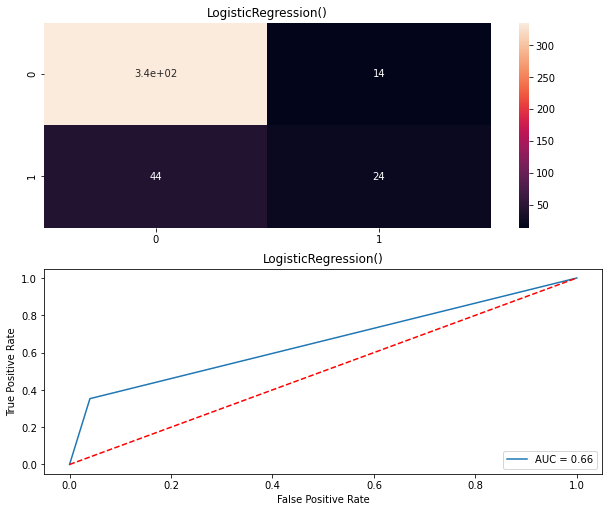

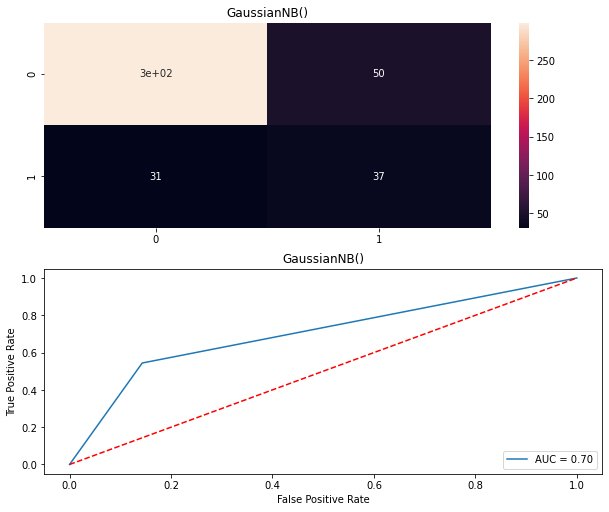

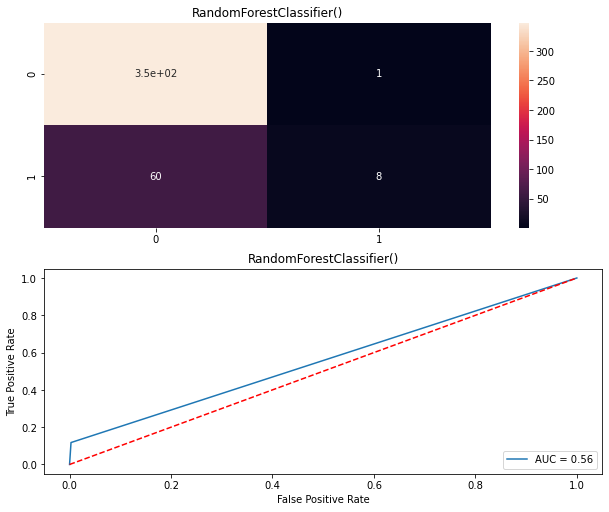

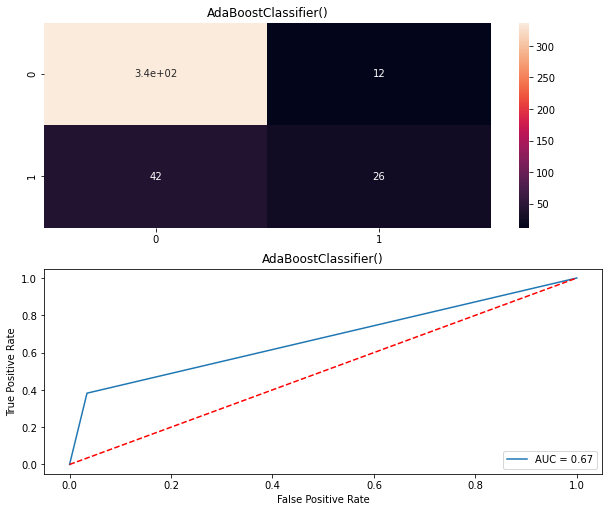

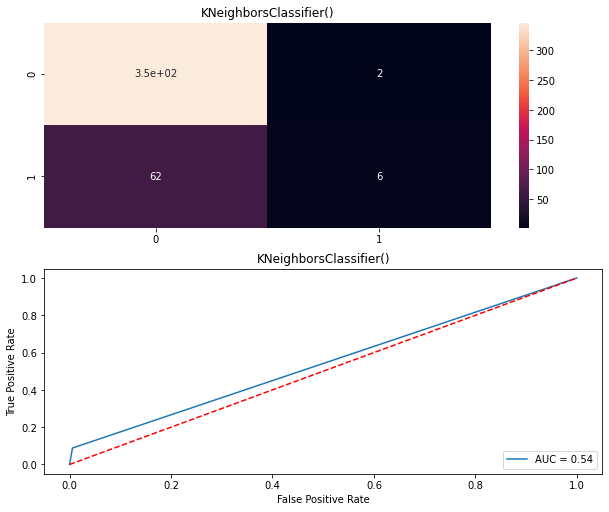

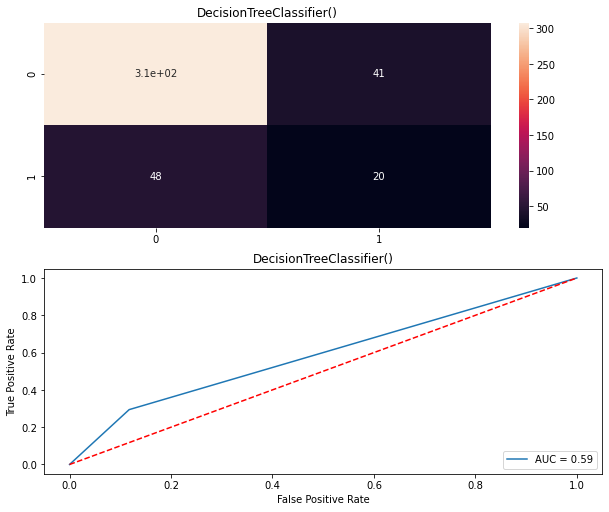

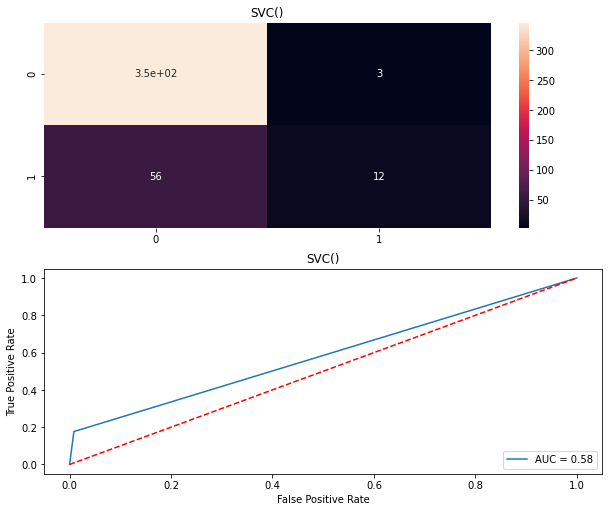

In [64]:
score=[]
cvs=[]
rocscore=[]
for i in model:
    print('\n')
    print('******************',i,'*******************')
    print('\n')
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    
    print('accuracy score:',i)
    score=accuracy_score(y_test,pred)
    print(score)
    
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print(classification_report(y_test,pred))
    
    cross=cross_val_score(i, x, y, cv=5, scoring='accuracy').mean()
    print('Cross Validation Score:',cross)
    cvs.append(cross)
    print('\n')
    
    print('auc score:',roc_auc_score(y_test,pred))
    print('\n')
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [66]:
Result = pd.DataFrame({'Model': model, 'Accuracy_score': score, 'Cross_val_score': cvs})
Result

,Model,Accuracy_score,Cross_val_score
0,LogisticRegression(),0.858513,0.872381
1,GaussianNB(),0.858513,0.790889
2,"(DecisionTreeClassifier(max_features='auto', r...",0.858513,0.851477
3,"(DecisionTreeClassifier(max_depth=1, random_st...",0.858513,0.867340
4,KNeighborsClassifier(),0.858513,0.845706
5,DecisionTreeClassifier(),0.858513,0.783682
6,SVC(),0.858513,0.858702


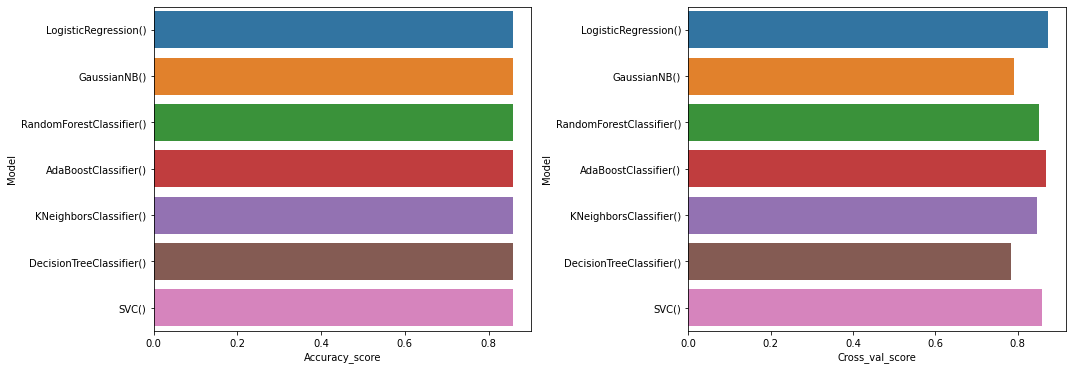

In [67]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'Accuracy_score', y = 'Model', data = Result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = Result)
plt.tight_layout()
plt.show()

# AS, we can see from the above graphical plotting, Ada Boost classifier model performing with best accuracy score & cross validation score & also rocscore is slightly better performnce than everyother models. 

# Hyper Paramter tuning

In [76]:
#parameter list of AdaBoost Classifier

from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[100,200,300],'learning_rate':[0.001,0.01,0.1,1]}
GCV=GridSearchCV(ADA,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 300]})

checking the best parameters-

In [77]:
GCV.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [78]:
predgcv=GCV.best_estimator_.predict(x_test)

In [79]:
print('Accuracy score:')
print(accuracy_score(y_test,predgcv))
print(confusion_matrix(y_test,predgcv))
print(classification_report(y_test,predgcv))
cvs_score=cross_val_score(GCV.best_estimator_, x, y, cv=10,scoring='accuracy')
print('Cross Validation Score:',score.mean())
print('auc score:',roc_auc_score(y_test,predgcv))

Accuracy score:
0.8729016786570744
[[346   3]
 [ 50  18]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       349
           1       0.86      0.26      0.40        68

    accuracy                           0.87       417
   macro avg       0.87      0.63      0.67       417
weighted avg       0.87      0.87      0.84       417

Cross Validation Score: 0.8585131894484412
auc score: 0.6280549469071296


Text(0.5, 0, 'False Positive Rate')

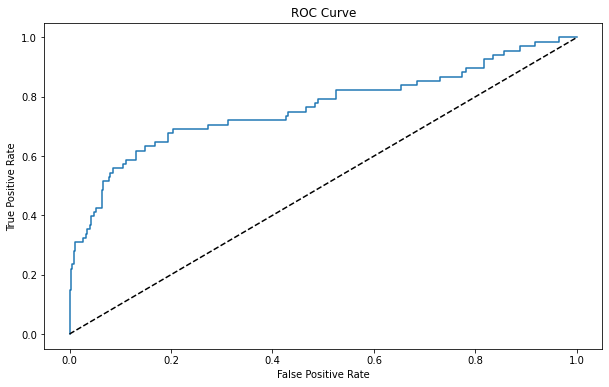

In [95]:
y_pred_prob=GCV.best_estimator_.predict_proba(x_test)[:,1]
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_prob)

plt.figure(figsize=(10,6))
plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, label='ADA Boost classifier')
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# MOdel Saving

In [96]:
#import joblib
#joblib.dump(ada_mod,"Finalmodel.pkl")